In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_1 = pd.read_csv("Rose.csv",parse_dates=['YearMonth'],squeeze=True,index_col=0)

In [3]:
df_1.head()

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

In [4]:
df_1.shape

(187,)

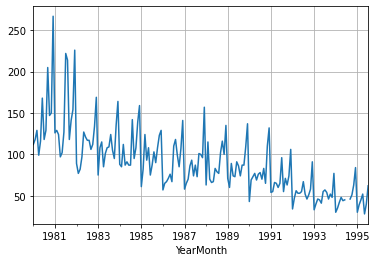

In [5]:
df_1.plot();
plt.grid()

In [6]:
df_2=pd.read_csv("Rose.csv")

In [7]:
df_2.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [8]:
df_2.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


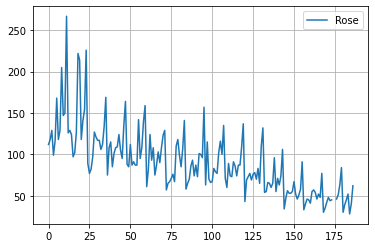

In [9]:
df_2.plot();
plt.grid()

In [10]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [11]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [12]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_2.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


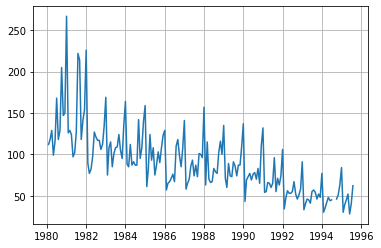

In [13]:
plt.plot(df_2['Time_Stamp'],df_2['Rose']);
plt.grid()

In [14]:
df_1.mean()

90.3945945945946

In [15]:
df_1.median()

86.0

In [16]:
df_1.describe()

count    185.000000
mean      90.394595
std       39.175344
min       28.000000
25%       63.000000
50%       86.000000
75%      112.000000
max      267.000000
Name: Rose, dtype: float64

In [17]:
df_1['1980']

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
1980-06-01    168.0
1980-07-01    118.0
1980-08-01    129.0
1980-09-01    205.0
1980-10-01    147.0
1980-11-01    150.0
1980-12-01    267.0
Name: Rose, dtype: float64

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


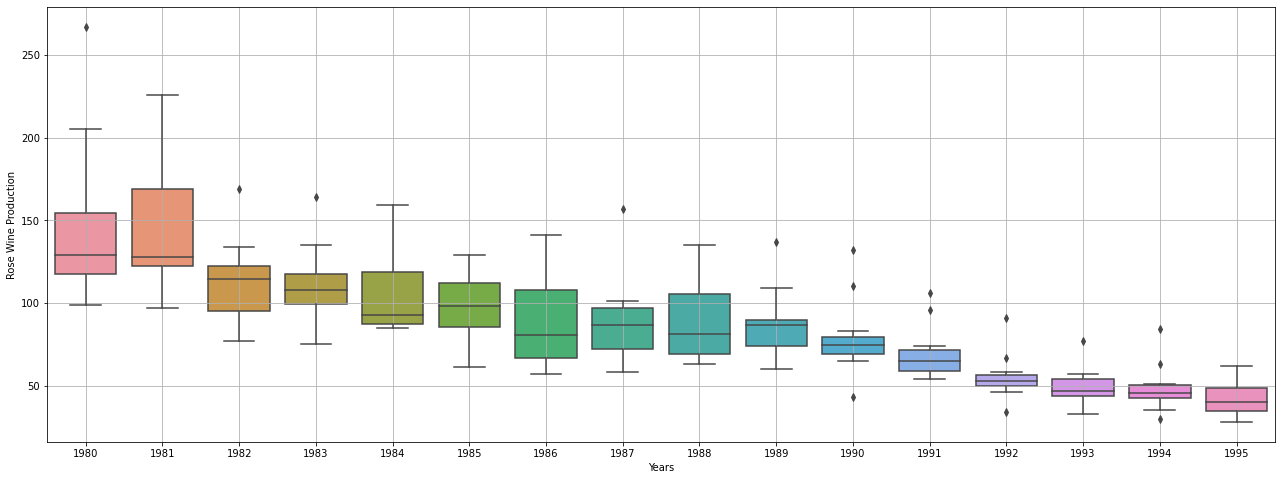

In [18]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Rose Wine Production');

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


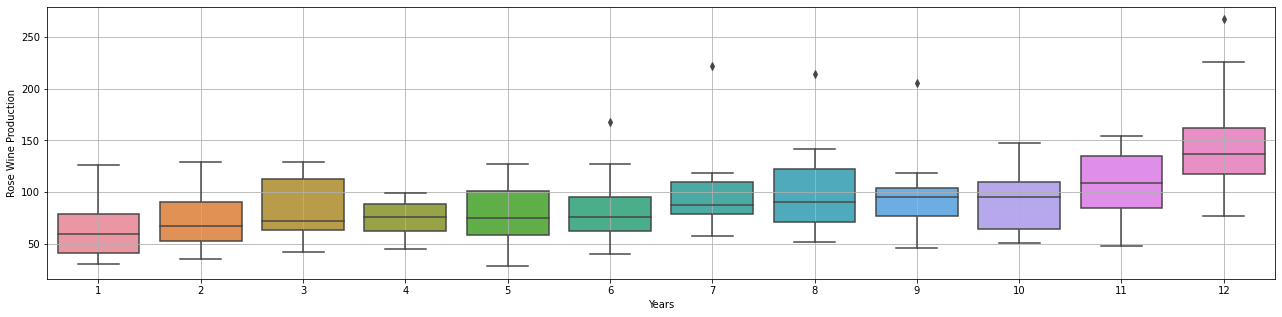

In [19]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Rose Wine Production');

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


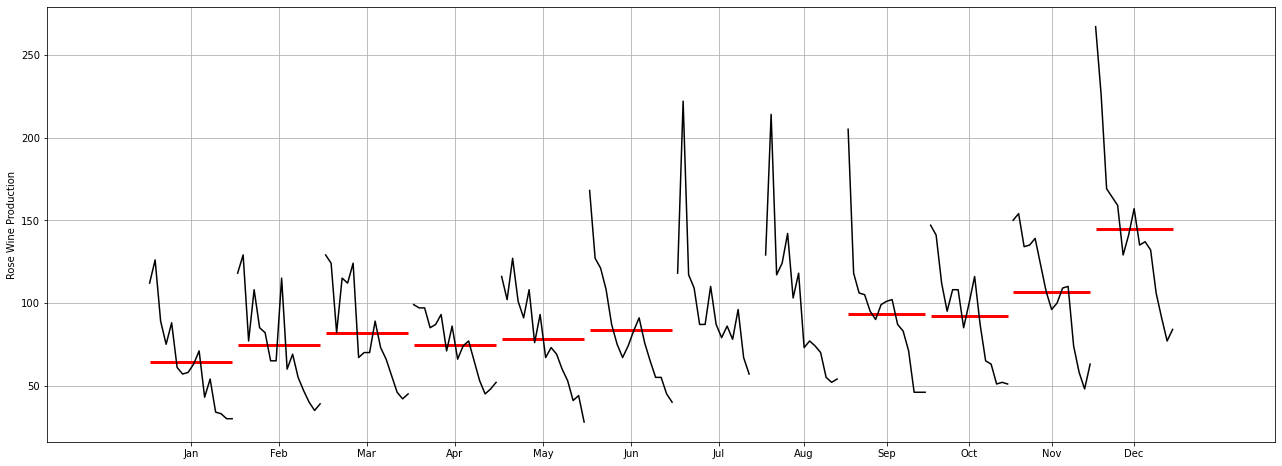

In [20]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='Rose Wine Production',ax=ax)
plt.grid();

In [21]:
df_2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_2.head()

,YearMonth,Rose
Time_Stamp,,
1980-01-31,1980-01,112.0
1980-02-29,1980-02,118.0
1980-03-31,1980-03,129.0
1980-04-30,1980-04,99.0
1980-05-31,1980-05,116.0


In [22]:
df_2.drop(labels='YearMonth',inplace=True,axis=1)
df_2.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [23]:
df_2['Rose']

Time_Stamp
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
              ...  
1995-03-31     45.0
1995-04-30     52.0
1995-05-31     28.0
1995-06-30     40.0
1995-07-31     62.0
Name: Rose, Length: 187, dtype: float64

In [24]:
yearly_sales_across_months = pd.pivot_table(df_2, values = 'Rose', columns = df_2.index.month, 
                                        index = df_2.index.year)

yearly_sales_across_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


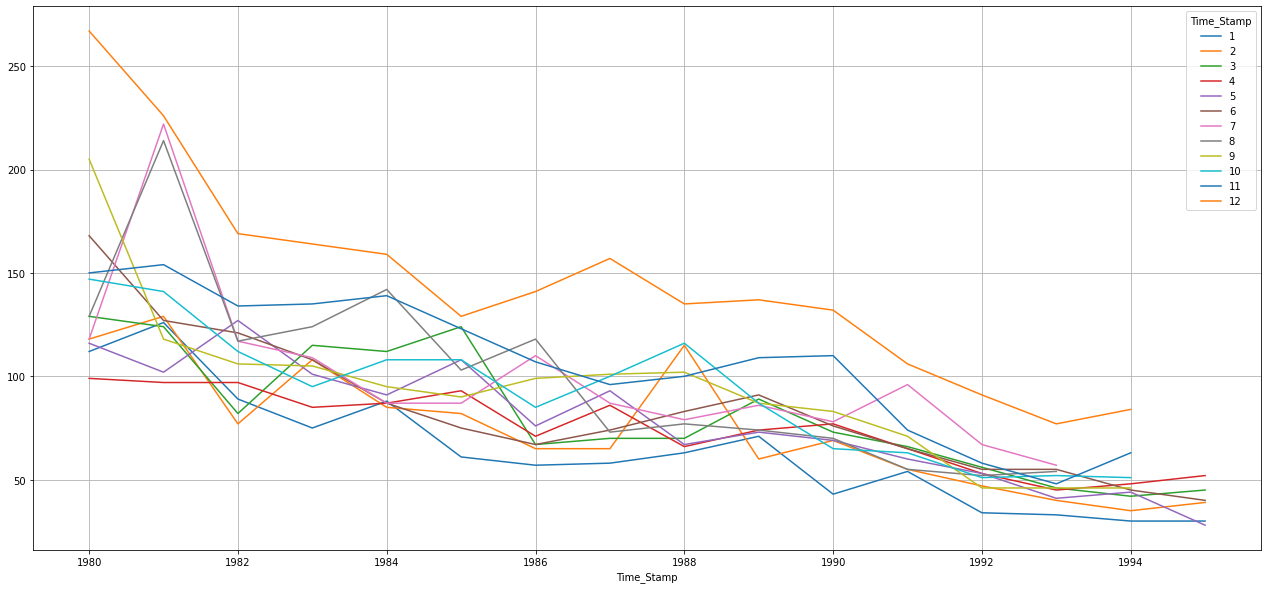

In [25]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

In [26]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

YearMonth
1980-12-31    1758.0
1981-12-31    1780.0
1982-12-31    1348.0
1983-12-31    1324.0
1984-12-31    1280.0
Freq: A-DEC, Name: Rose, dtype: float64

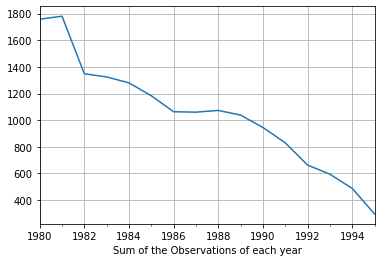

In [27]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [28]:
df_yearly_mean = df_1.resample('Y').mean()
df_yearly_mean.head()

YearMonth
1980-12-31    146.500000
1981-12-31    148.333333
1982-12-31    112.333333
1983-12-31    110.333333
1984-12-31    106.666667
Freq: A-DEC, Name: Rose, dtype: float64

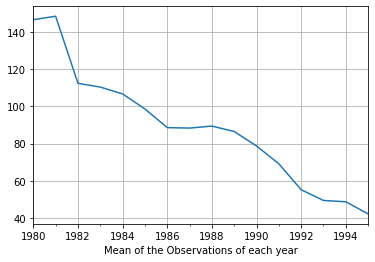

In [29]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

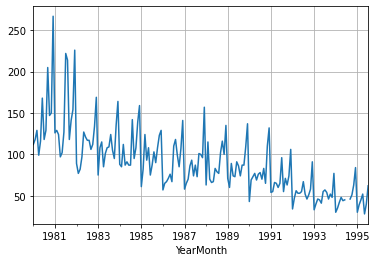

In [30]:
df_1.plot()
plt.grid();

In [31]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

YearMonth
1980-03-31    359.0
1980-06-30    383.0
1980-09-30    452.0
1980-12-31    564.0
1981-03-31    379.0
Freq: Q-DEC, Name: Rose, dtype: float64

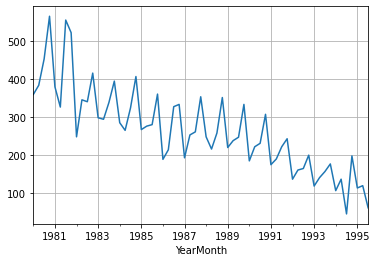

In [32]:
df_quarterly_sum.plot();
plt.grid()

In [33]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

YearMonth
1980-03-31    119.666667
1980-06-30    127.666667
1980-09-30    150.666667
1980-12-31    188.000000
1981-03-31    126.333333
Freq: Q-DEC, Name: Rose, dtype: float64

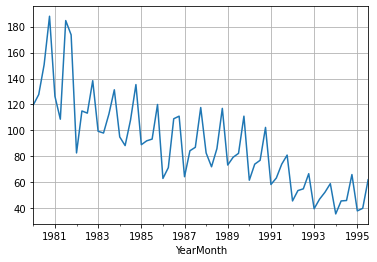

In [34]:
df_quarterly_mean.plot();
plt.grid()

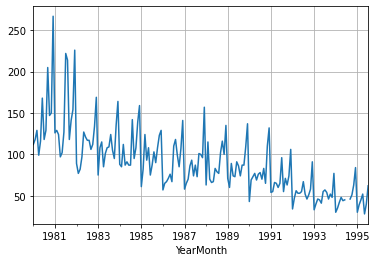

In [35]:
df_1.plot()
plt.grid();

In [36]:
df_daily_sum = df_1.resample('D').sum()
df_daily_sum

YearMonth
1980-01-01    112.0
1980-01-02      0.0
1980-01-03      0.0
1980-01-04      0.0
1980-01-05      0.0
              ...  
1995-06-27      0.0
1995-06-28      0.0
1995-06-29      0.0
1995-06-30      0.0
1995-07-01     62.0
Freq: D, Name: Rose, Length: 5661, dtype: float64

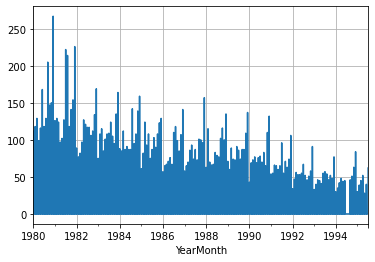

In [37]:
df_daily_sum.plot()
plt.grid();

In [38]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

YearMonth
1980-12-31     1758.0
1990-12-31    12094.0
2000-12-31     2871.0
Freq: 10A-DEC, Name: Rose, dtype: float64

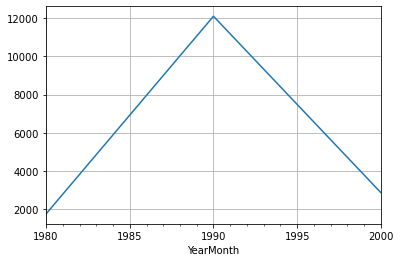

In [39]:
df_decade_sum.plot();
plt.grid()

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Missing Value Handling

In [41]:
df_1.isna().sum()

2

In [42]:
df_2.isna().sum()

Rose    2
dtype: int64

In [43]:
df_1['1994']

YearMonth
1994-01-01    30.0
1994-02-01    35.0
1994-03-01    42.0
1994-04-01    48.0
1994-05-01    44.0
1994-06-01    45.0
1994-07-01     NaN
1994-08-01     NaN
1994-09-01    46.0
1994-10-01    51.0
1994-11-01    63.0
1994-12-01    84.0
Name: Rose, dtype: float64

In [44]:
df_2['1994']

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/2630423206.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2['1994']


,Rose
Time_Stamp,
1994-01-31,30.0
1994-02-28,35.0
1994-03-31,42.0
1994-04-30,48.0
1994-05-31,44.0
1994-06-30,45.0
1994-07-31,NaN
1994-08-31,NaN
1994-09-30,46.0


In [45]:
df_1['1994']=df_1.interpolate()['1994']

In [46]:
df_2['1994']=df_2.interpolate()['1994']

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/2989995376.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2['1994']=df_2.interpolate()['1994']


In [47]:
df_1['1994']

YearMonth
1994-01-01    30.000000
1994-02-01    35.000000
1994-03-01    42.000000
1994-04-01    48.000000
1994-05-01    44.000000
1994-06-01    45.000000
1994-07-01    45.333333
1994-08-01    45.666667
1994-09-01    46.000000
1994-10-01    51.000000
1994-11-01    63.000000
1994-12-01    84.000000
Name: Rose, dtype: float64

In [48]:
df_2['1994']

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/2630423206.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2['1994']


,Rose
Time_Stamp,
1994-01-31,30.000000
1994-02-28,35.000000
1994-03-31,42.000000
1994-04-30,48.000000
1994-05-31,44.000000
1994-06-30,45.000000
1994-07-31,45.333333
1994-08-31,45.666667
1994-09-30,46.000000


In [49]:
df_1.isna().sum()

0

In [50]:
df_2.isna().sum()

Rose    0
dtype: int64

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

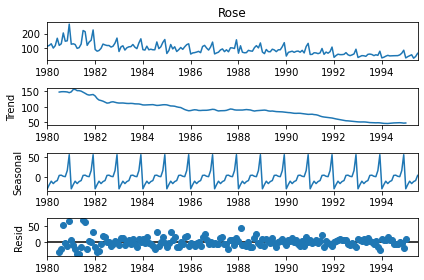

In [52]:
decomposition_additive = seasonal_decompose(df_1,model='additive')
decomposition_additive.plot();

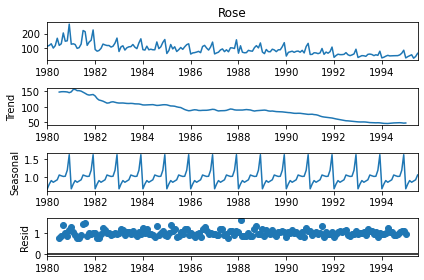

In [53]:
decomposition_multiplicative = seasonal_decompose(df_1,model='multiplicative')
decomposition_multiplicative.plot();

In [54]:
new_df_add = pd.concat([decomposition_additive.seasonal, decomposition_additive.trend, decomposition_additive.resid, decomposition_additive.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head(10)

,seasoanilty,trend,residual,actual_values
YearMonth,,,,
1980-01-01,-27.908647,NaN,NaN,112.0
1980-02-01,-17.435632,NaN,NaN,118.0
1980-03-01,-9.285830,NaN,NaN,129.0
1980-04-01,-15.098330,NaN,NaN,99.0
1980-05-01,-10.196544,NaN,NaN,116.0
1980-06-01,-7.678687,NaN,NaN,168.0
1980-07-01,4.896908,147.083333,-33.980241,118.0
1980-08-01,5.499686,148.125000,-24.624686,129.0
1980-09-01,2.774686,148.375000,53.850314,205.0


In [55]:
new_df_mult = pd.concat([decomposition_multiplicative.seasonal,decomposition_multiplicative.trend, decomposition_multiplicative.resid, decomposition_multiplicative.observed], axis=1)
new_df_mult.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_mult.head(10)

,seasoanilty,trend,residual,actual_values
YearMonth,,,,
1980-01-01,0.670111,NaN,NaN,112.0
1980-02-01,0.806163,NaN,NaN,118.0
1980-03-01,0.901164,NaN,NaN,129.0
1980-04-01,0.854024,NaN,NaN,99.0
1980-05-01,0.889415,NaN,NaN,116.0
1980-06-01,0.923985,NaN,NaN,168.0
1980-07-01,1.058038,147.083333,0.758258,118.0
1980-08-01,1.035881,148.125000,0.840720,129.0
1980-09-01,1.017648,148.375000,1.357674,205.0


In [56]:
train    =   df_2[0:int(len(df_1)*0.71)] 
test     =   df_2[int(len(df_1)*0.71):]

In [57]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [58]:
test.head()

,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


In [59]:
train.tail()

,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


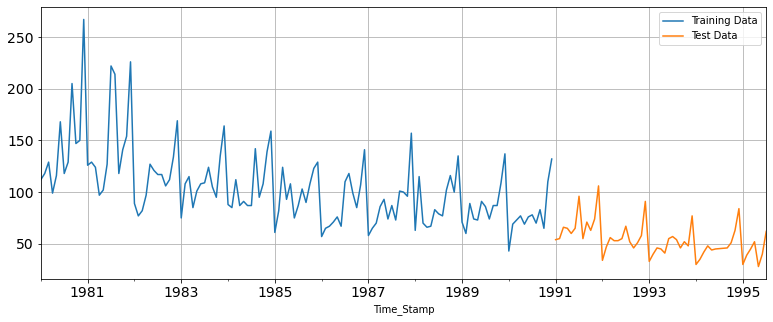

In [60]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Building different models and comparing the accuracy metrics.

# Model 1: Linear Regression


In [61]:
range(len(train))

range(0, 132)

In [62]:
df_2.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [63]:
train_time = []
for i in range(len(train)):
    train_time.append(i + 1)

In [64]:
print(train_time)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


In [65]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [66]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [67]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



# Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [69]:
lr = LinearRegression()

In [70]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

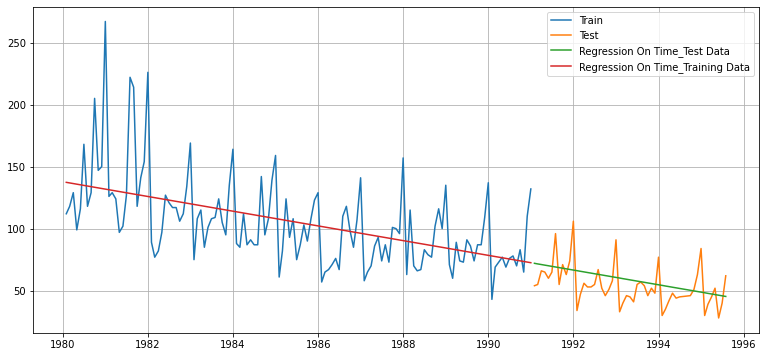

In [71]:
LinearRegression_train['RegOnTime']  = lr.predict(LinearRegression_train[['time']])

LinearRegression_test['RegOnTime']   = lr.predict(LinearRegression_test[['time']])


plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [72]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    return mape

In [73]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Rose'],LinearRegression_train['RegOnTime'],squared=False)
mape_model1_train = MAPE(train['Rose'],LinearRegression_train['RegOnTime'])
print("For RegressionOnTime forecast on the Training Data, RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data, RMSE is 30.718 MAPE is 21.22


In [74]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],LinearRegression_test['RegOnTime'],squared=False)
mape_model1_test = MAPE(test['Rose'],LinearRegression_test['RegOnTime'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 MAPE is 22.82


In [75]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82


# Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [76]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [77]:
NaiveModel_train['Rose'][len(NaiveModel_train) - 1]

132.0

In [78]:
NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [79]:
np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]

132.0

In [80]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

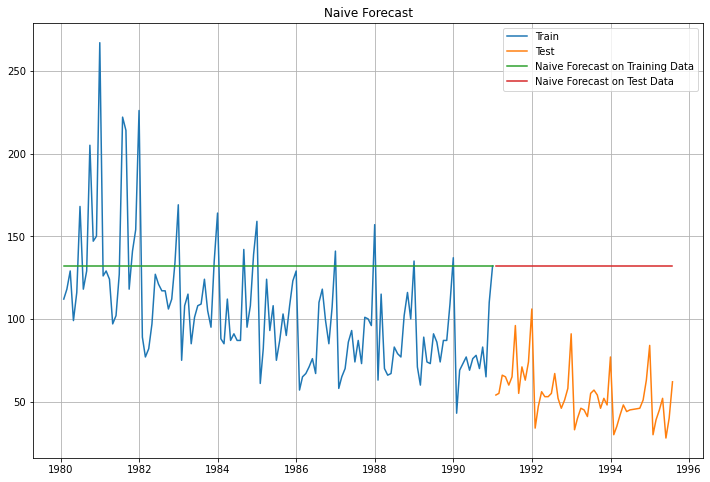

In [81]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [82]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Rose'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 45.064 MAPE is 36.38


In [83]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719 MAPE is 145.10


In [84]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10


## Method 3: Simple Average


#### For this particular simple average method, we will forecast by using the average of the training values.

In [85]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [86]:
SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_train.head()

,Rose,mean_forecast
Time_Stamp,,
1980-01-31,112.0,104.939394
1980-02-29,118.0,104.939394
1980-03-31,129.0,104.939394
1980-04-30,99.0,104.939394
1980-05-31,116.0,104.939394


In [87]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


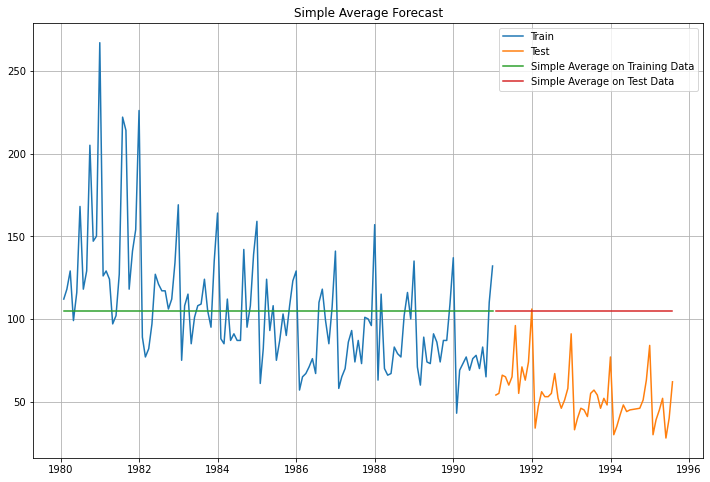

In [88]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [89]:
rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Rose'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 36.034 MAPE is 25.39


In [90]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461 MAPE is 94.93


In [91]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [92]:
MovingAverage = df_2.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [93]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


In [94]:
MovingAverage['Trailing_3'] = MovingAverage['Rose'].rolling(3).mean()

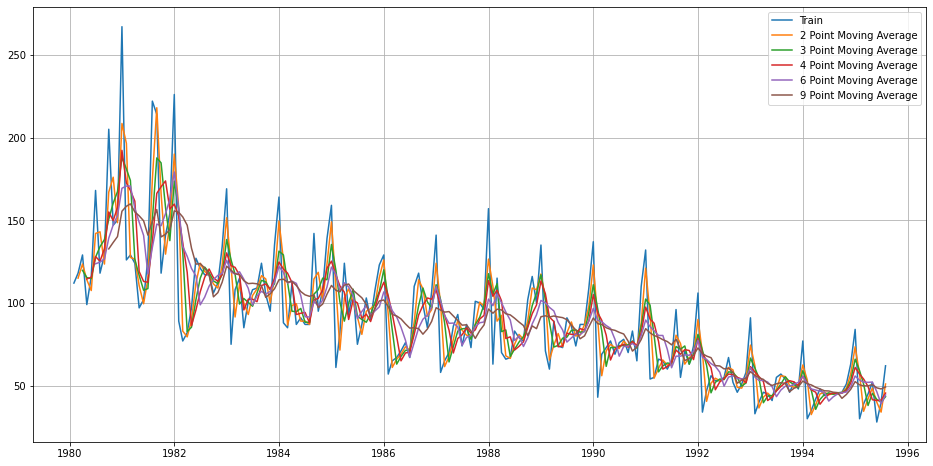

In [95]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [96]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

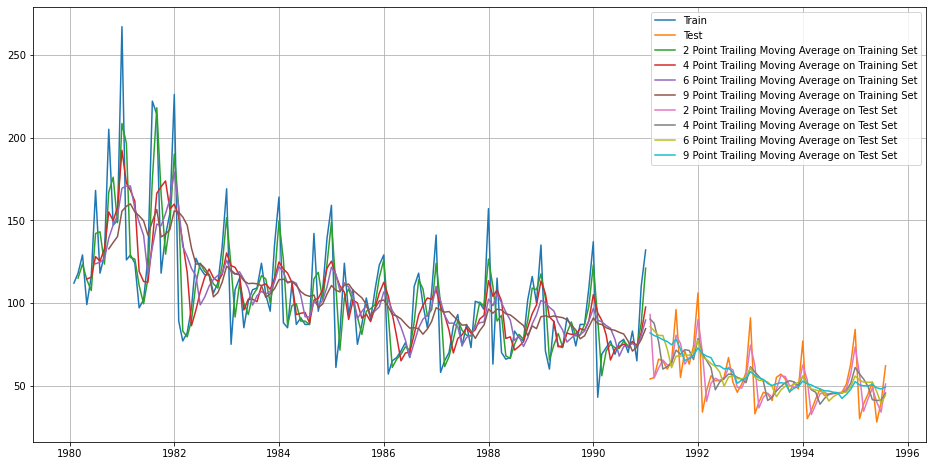

In [97]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [98]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529 MAPE is 13.54
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451 MAPE is 19.49
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566 MAPE is 20.82
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 MAPE is 21.01


In [99]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01


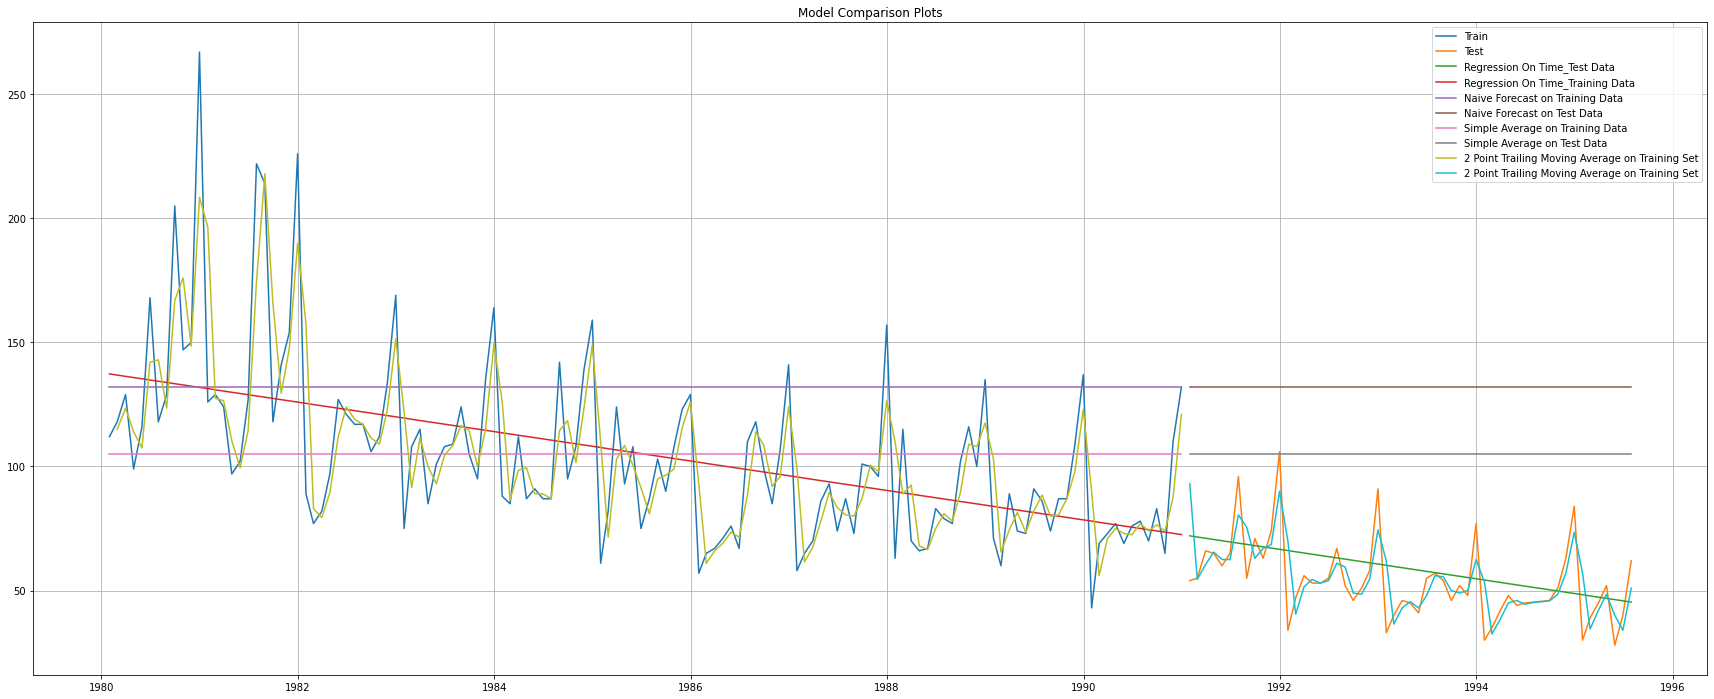

In [100]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [101]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [102]:
SES_train = train.copy()
SES_test = test.copy()

In [103]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [104]:
model_SES_autofit = model_SES.fit()

In [105]:
model_SES_autofit.params

{'smoothing_level': 0.09874930910606859,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38712578461187,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [106]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

,Rose,predict
Time_Stamp,,
1980-01-31,112.0,134.387126
1980-02-29,118.0,132.176413
1980-03-31,129.0,130.776502
1980-04-30,99.0,130.601073
1980-05-31,116.0,127.480489


In [107]:
len(SES_test)

55

In [108]:
SES_train.tail()

,Rose,predict
Time_Stamp,,
1990-08-31,70.0,81.577284
1990-09-30,83.0,80.434036
1990-10-31,65.0,80.687423
1990-11-30,110.0,79.138301
1990-12-31,132.0,82.185872


In [109]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.104983
1991-02-28,55.0,87.104983
1991-03-31,66.0,87.104983
1991-04-30,65.0,87.104983
1991-05-31,60.0,87.104983


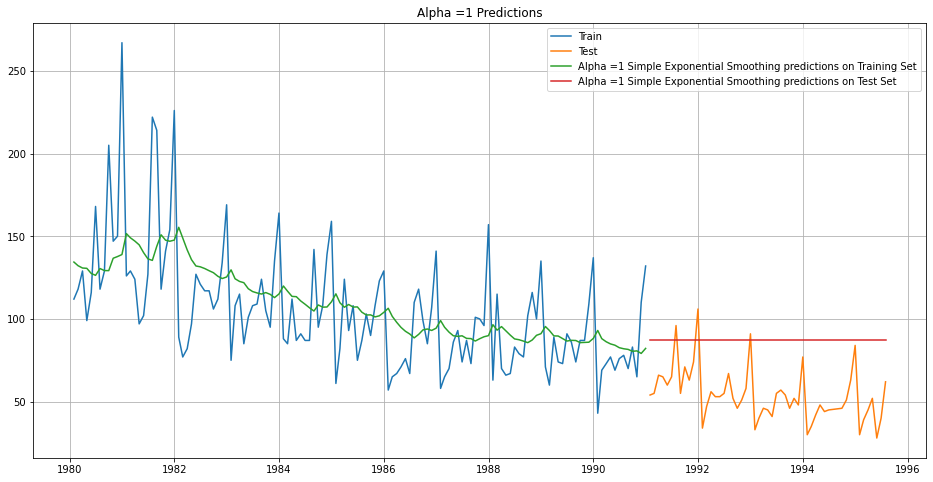

In [110]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

In [111]:
rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Rose'],SES_train['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 31.501 MAPE is 22.73


In [112]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Rose'],SES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 36.796 MAPE is 63.88


In [113]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796227,63.88


In [114]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [115]:
for i in np.arange(0.3,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Rose'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Rose'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

In [116]:
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,32.470164,22.31,47.504821,83.71
1,0.4,33.035130,22.50,53.767406,95.50
2,0.5,33.682839,22.68,59.641786,106.81
3,0.6,34.441171,22.88,64.971288,117.04
4,0.7,35.323261,23.08,69.698162,126.07
5,0.8,36.334596,23.41,73.773992,133.83
6,0.9,37.482782,23.93,77.139276,140.22
7,1.0,38.783783,24.75,79.718773,145.10


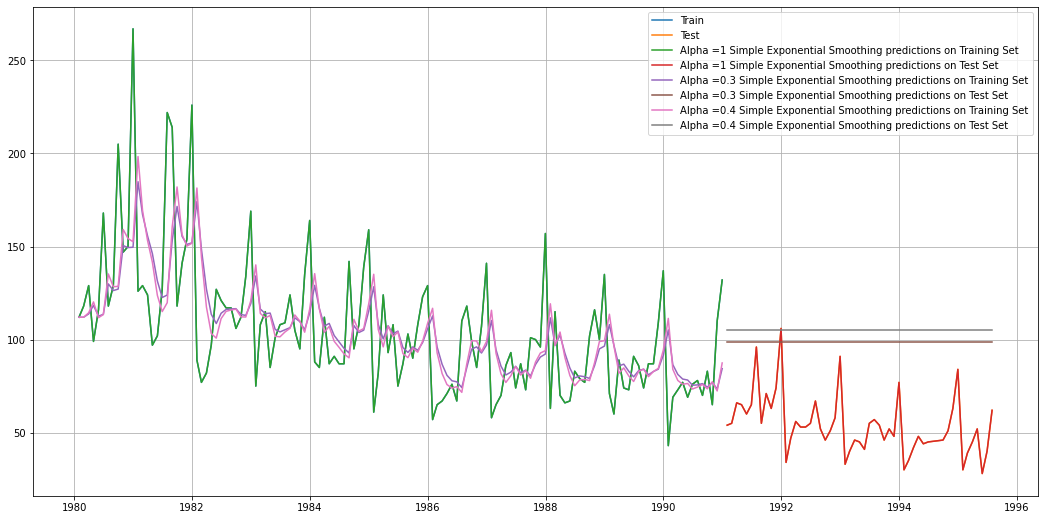

In [117]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['Rose'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['Rose'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [118]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing','Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796227,63.88
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.71
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.50


## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [119]:
DES_train = train.copy()
DES_test = test.copy()

In [120]:
model_DES = Holt(DES_train['Rose'])

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [121]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [122]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Rose'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Rose'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/4148852636.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/4148852636.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/4148852636.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/4148852636.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(s

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/4148852636.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/4148852636.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/4148852636.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/4148852636.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(s

In [123]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,35.944983,25.48,265.567594,442.50
1,0.3,0.4,37.393239,26.53,358.750942,593.91
2,0.3,0.5,38.888325,27.54,451.810230,745.22
3,0.3,0.6,40.280670,28.63,536.954148,883.91
4,0.3,0.7,41.403518,29.56,601.616351,989.57
...,...,...,...,...,...,...
59,1.0,0.6,51.831610,34.67,801.680218,1323.85
60,1.0,0.7,54.497039,36.43,841.892573,1388.87
61,1.0,0.8,57.365879,38.27,853.965537,1408.39
62,1.0,0.9,60.474309,40.21,834.710935,1377.26


In [124]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,35.944983,25.48,265.567594,442.50
8,0.4,0.3,36.749123,25.55,339.306534,565.42
1,0.3,0.4,37.393239,26.53,358.750942,593.91
16,0.5,0.3,37.433314,25.46,394.272629,657.17
24,0.6,0.3,38.348984,25.60,439.296033,732.29


In [125]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,35.944983,25.48,265.567594,442.50
8,0.4,0.3,36.749123,25.55,339.306534,565.42
1,0.3,0.4,37.393239,26.53,358.750942,593.91
16,0.5,0.3,37.433314,25.46,394.272629,657.17
9,0.4,0.4,38.004622,26.40,441.965558,732.26


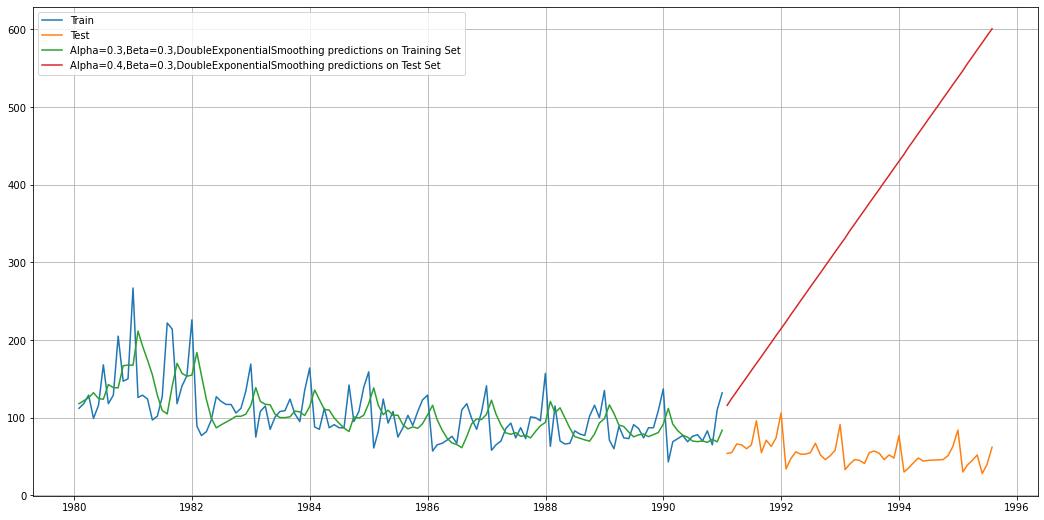

In [126]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.4, 0.3], label='Alpha=0.4,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [127]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796227,63.88
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.71
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.50


## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)
##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

<AxesSubplot:xlabel='Time_Stamp'>

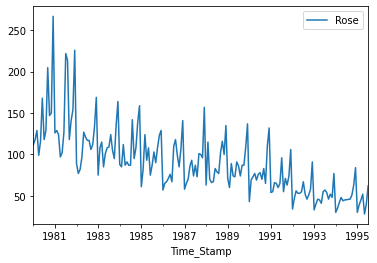

In [128]:
df_2.plot()

In [129]:
TES_train = train.copy()
TES_test = test.copy()

In [130]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M',seasonal_periods=12)

In [131]:
model_TES_autofit = model_TES.fit()

In [132]:
model_TES_autofit.params

{'smoothing_level': 0.06621892536991639,
 'smoothing_trend': 0.05130241597404643,
 'smoothing_seasonal': 2.6732907021486167e-07,
 'damping_trend': nan,
 'initial_level': 126.39721935732165,
 'initial_trend': -0.7794874071912484,
 'initial_seasons': array([0.89177529, 1.01159891, 1.1054501 , 0.96614341, 1.08623824,
        1.18412446, 1.3017767 , 1.38469327, 1.31294464, 1.28483844,
        1.49775256, 2.06558486]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [133]:
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Rose,auto_predict
Time_Stamp,,
1980-01-31,112.0,112.022789
1980-02-29,118.0,126.284433
1980-03-31,129.0,136.508466
1980-04-30,99.0,118.069035
1980-05-31,116.0,130.350793


In [134]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.665453
1991-02-28,55.0,64.085515
1991-03-31,66.0,69.819256
1991-04-30,65.0,60.835667
1991-05-31,60.0,68.189618


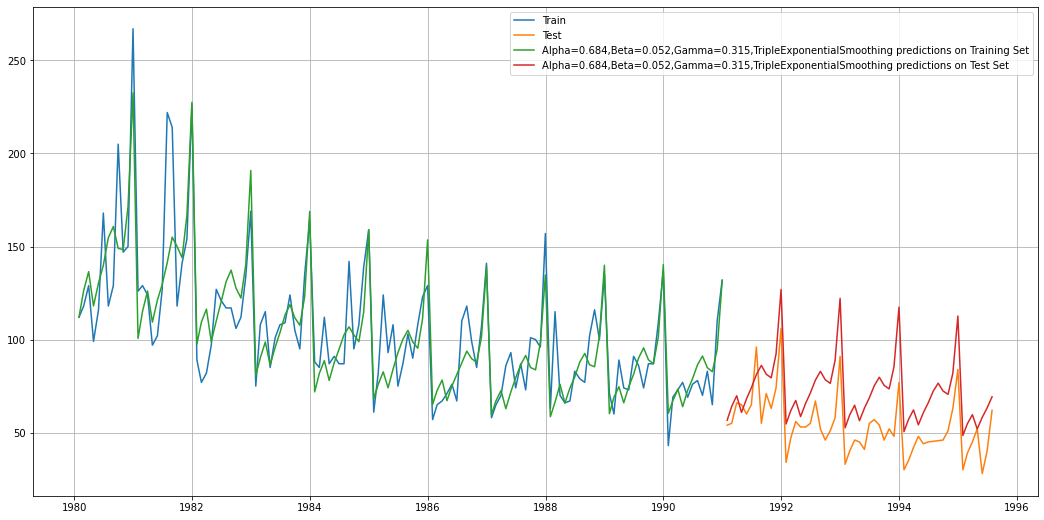

In [135]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [136]:
rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Rose'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Rose'],TES_train['auto_predict'])
print("For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 18.405 MAPE is 12.56


In [137]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Rose'],TES_test['auto_predict'])
print("For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.950 MAPE is 35.03


In [138]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796227,63.88
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.71
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.50


In [139]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [140]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Rose'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Rose'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 's

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/177325039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

In [141]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,0.3,23.344917,16.60,19.678137,31.90
1,0.3,0.3,0.4,24.588120,17.28,10.164021,13.58
2,0.3,0.3,0.5,26.190281,18.25,31.752391,47.38
3,0.3,0.3,0.6,28.250682,19.53,81.338805,127.04
4,0.3,0.3,0.7,30.948221,21.18,153.240421,237.94
...,...,...,...,...,...,...,...
507,1.0,1.0,0.6,2140.632923,561.57,6630.658821,6701.42
508,1.0,1.0,0.7,3091.001599,890.00,9721.144214,13046.11
509,1.0,1.0,0.8,2438.212926,628.69,2573.842630,1998.89
510,1.0,1.0,0.9,28835.801100,3026.25,3522.899080,2624.27


In [142]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
1,0.3,0.3,0.4,24.588120,17.28,10.164021,13.58
9,0.3,0.4,0.4,25.599445,17.89,10.371778,13.38
80,0.4,0.5,0.3,26.917917,18.51,13.393925,19.30
24,0.3,0.6,0.3,25.815213,17.88,15.485453,24.44
194,0.6,0.3,0.5,31.758130,20.48,17.245971,23.81


In [143]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
9,0.3,0.4,0.4,25.599445,17.89,10.371778,13.38
1,0.3,0.3,0.4,24.588120,17.28,10.164021,13.58
80,0.4,0.5,0.3,26.917917,18.51,13.393925,19.30
68,0.4,0.3,0.7,32.384509,20.85,20.152276,23.66
194,0.6,0.3,0.5,31.758130,20.48,17.245971,23.81


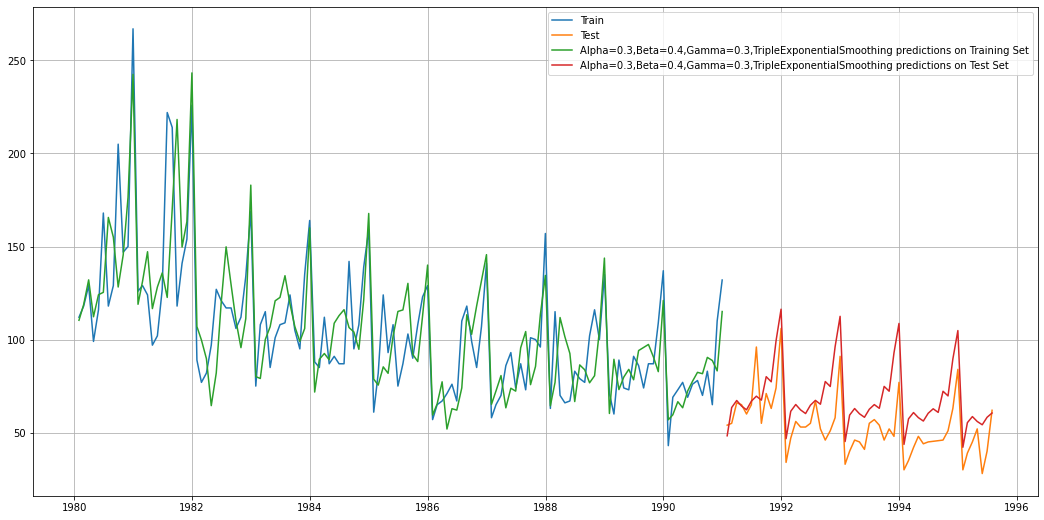

In [144]:
plt.figure(figsize=(18,9))

plt.plot(TES_train['Rose'], label='Train')

plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')




plt.legend(loc='best')
plt.grid();

In [145]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][1]],'Test MAPE':[resultsDf_8_2['Test MAPE'][1]]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796227,63.88
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.71
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.50


In [146]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][8]],'Test MAPE':[resultsDf_8_2['Test MAPE'][8]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796227,63.88
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.71
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.50


# Check for stationarity of the whole Time Series data.

In [147]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    #rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    plt.grid()
    #mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [148]:
dftest = adfuller(df_2['Rose'], autolag='AIC')

In [149]:
dftest


(-1.8766991079908288,
 0.3431007142833732,
 13,
 173,
 {'1%': -3.4687256239864017,
  '5%': -2.8783961376954363,
  '10%': -2.57575634100705},
 1516.2583629826854)

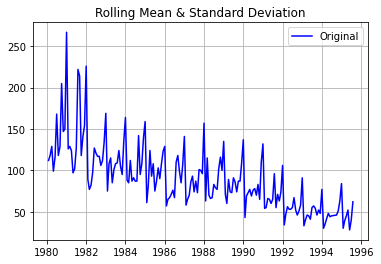

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [150]:
test_stationarity(df_2['Rose'])

We see that at 5% significant level the Time Series is non-stationary.
Ho:The Series is  Non stationary 
Ha:The Series is stationary

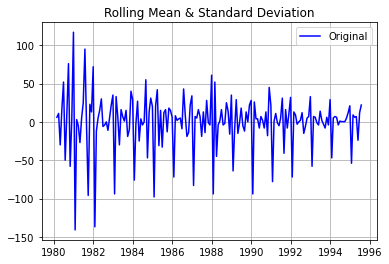

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [151]:
test_stationarity(df_2['Rose'].diff().dropna())

Hence the P value is too small to prove for Null Hypothesis 
Hence the difference of one is stationarity
Hence here the d value is 1

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [152]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

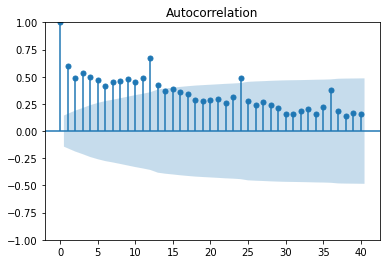

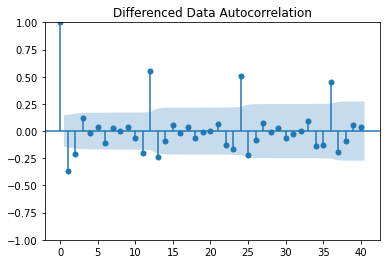

In [153]:
plot_acf(df_2['Rose'],lags=40)
plot_acf(df_2['Rose'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plt.show()

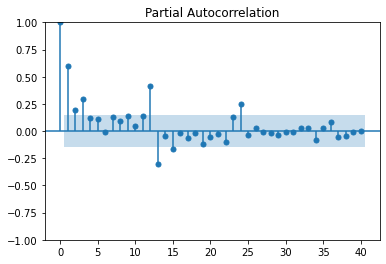

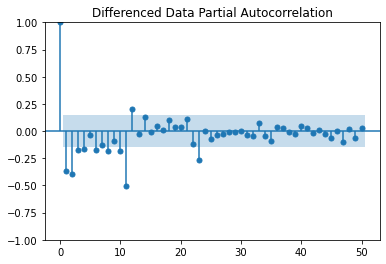

In [154]:
plot_pacf(df_2['Rose'],lags=40)
plot_pacf(df_2['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data using ACF

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 1991. Test Data is from the beginning of 1911 to the last time stamp provided.

In [155]:
train = df_2[df_2.index.year < 1991]
test = df_2[df_2.index.year >= 1991]

In [156]:
from IPython.display import display

In [157]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [158]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

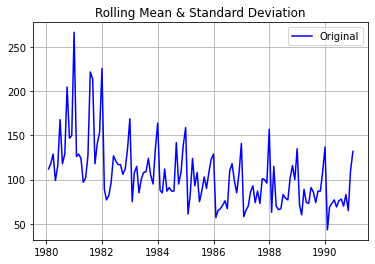

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [159]:
test_stationarity(train['Rose'])

We see that the series is not stationary at $\alpha$ = 0.05.

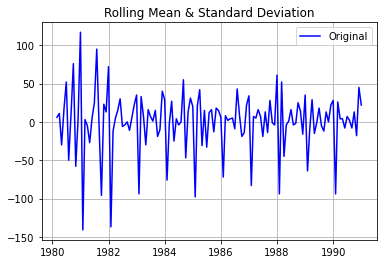

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [160]:
test_stationarity(train['Rose'].diff().dropna())

Now the Series is stationarity

If the series is non-stationary, take a difference in the time series to stationarize it. Then, we can train the ARIMA models using this specific differenced series. Since we are evaluating our models there rather than building any models on the Test Data, we do not need to be concerned about stationarity for the Test Data. To make the time series stationary, you can consider applying other types of transformations, such as taking logarithms

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [212]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

#p = 0  to 2
#d = 1
#q = 0 to 2

import itertools
p = q = range(0, 4)
d = range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [213]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [214]:
from statsmodels.tsa.arima.model import ARIMA


In [215]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.6715288535765
ARIMA(0, 1, 3) - AIC:1280.5453761734648
ARIMA(1, 1, 0) - AIC:1317.3503105381506
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231906
ARIMA(1, 1, 3) - AIC:1281.8707223309957
ARIMA(2, 1, 0) - AIC:1298.6110341604915
ARIMA(2, 1, 1) - AIC:1281.5078621868545
ARIMA(2, 1, 2) - AIC:1281.8707222264388


/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) - AIC:1274.695640455967
ARIMA(3, 1, 0) - AIC:1297.481091727168
ARIMA(3, 1, 1) - AIC:1282.419277627197
ARIMA(3, 1, 2) - AIC:1283.7207405977147
ARIMA(3, 1, 3) - AIC:1278.6694546123006


/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [216]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
11,"(2, 1, 3)",1274.695640
15,"(3, 1, 3)",1278.669455
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376
5,"(1, 1, 1)",1280.574230
9,"(2, 1, 1)",1281.507862
10,"(2, 1, 2)",1281.870722
7,"(1, 1, 3)",1281.870722
1,"(0, 1, 1)",1282.309832


In [223]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,3),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Wed, 30 Nov 2022   AIC                           1274.696
Time:                        15:15:52   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.706
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6778      0.084    -20.039      0.000      -1.842      -1.514
ar.L2         -0.7286      0.084     -8.703      0.000      -0.893      -0.565
ma.L1          1.0443      0.610      1.711      0.0

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Predict on the Test Set using this model and evaluate the model.

In [224]:
len(test)

55

In [225]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [229]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape_model19_test=MAPE(test['Rose'],predicted_auto_ARIMA)
print(rmse)
print(mape_model19_test)

36.80843900573034
63.89


In [227]:
predicted_auto_ARIMA[0]

85.61074729760222

In [171]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape_model19_test]}
                           ,index=['Auto ARIMA(0,1,2)'])

resultsDf_11

,Test RMSE,Test MAPE
"Auto ARIMA(0,1,2)",37.30648,64.81


In [172]:
auto_ARIMA = ARIMA(train['Rose'], order=(1,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -635.935
Date:                Wed, 30 Nov 2022   AIC                           1279.871
Time:                        15:08:51   BIC                           1291.372
Sample:                    01-31-1980   HQIC                          1284.544
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.263     -1.723      0.085      -0.970       0.062
ma.L1         -0.2542      0.242     -1.049      0.294      -0.729       0.221
ma.L2         -0.5983      0.201     -2.970      0.0

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


## Predict on the Test Set using this model and evaluate the model.

In [173]:
len(test)

55

In [174]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [175]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape_model19_test=MAPE(test['Rose'],predicted_auto_ARIMA)

print(rmse)
print(mape_model19_test)

36.87065955293679
64.02


In [176]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto ARIMA(1,1,2)'])

resultsDf

,RMSE
"Auto ARIMA(1,1,2)",36.87066


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.


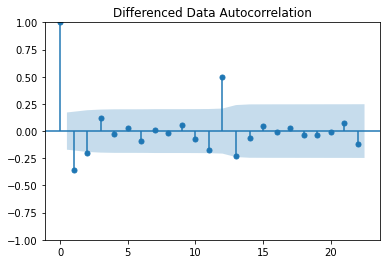

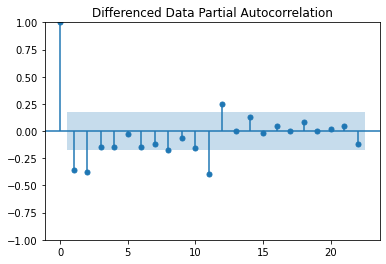

In [177]:
plot_acf(train['Rose'].diff().dropna(),title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff().dropna(),title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the lag at which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 1.

In [178]:
manual_ARIMA = ARIMA(train['Rose'], order=(1,1,1),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -637.287
Date:                Wed, 30 Nov 2022   AIC                           1280.574
Time:                        15:08:51   BIC                           1289.200
Sample:                    01-31-1980   HQIC                          1284.079
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1814      0.076      2.396      0.017       0.033       0.330
ma.L1         -0.9192      0.053    -17.362      0.000      -1.023      -0.815
sigma2       972.5964     88.768     10.957      0.0

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


## Predict on the Test Set using this model and evaluate the model.

In [179]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [180]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape_model20_test=MAPE(test['Rose'],predicted_manual_ARIMA)

print(rmse)
print(mape_model20_test)

37.44319654766231
65.08


In [181]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape_model20_test]}
                           ,index=['Manual ARIMA(1,1,1)'])


resultsDf_11 = pd.concat([resultsDf_11,temp_resultsDf])

resultsDf_11

,Test RMSE,Test MAPE
"Auto ARIMA(0,1,2)",37.306480,64.81
"Manual ARIMA(1,1,1)",37.443197,65.08


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Manual Version of SARIMA 

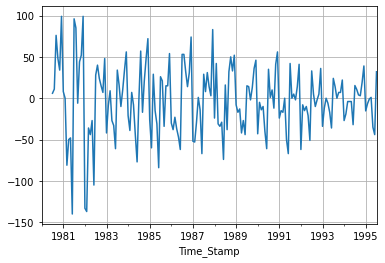

In [239]:
(df_2['Rose'].diff(6)).plot()
plt.grid();

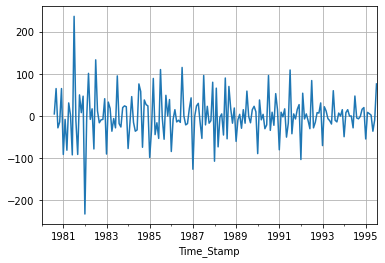

In [241]:
(df_2['Rose'].diff(6)).diff().plot()
plt.grid();

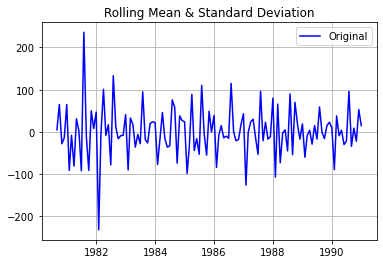

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [242]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

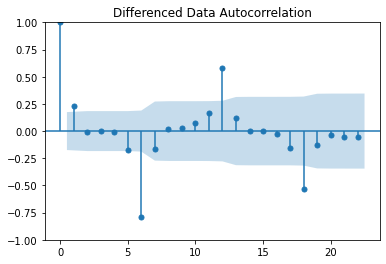

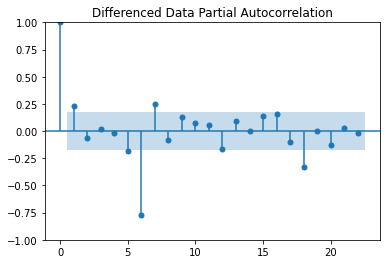

In [230]:
plot_acf(train['Rose'].diff(6).dropna(),title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff(6).dropna(),title='Differenced Data Partial Autocorrelation')
plt.show()

In [246]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42585D+00    |proj g|=  6.04359D-02

At iterate    5    f=  4.41809D+00    |proj g|=  1.30168D-02

At iterate   10    f=  4.38084D+00    |proj g|=  8.01015D-02

At iterate   15    f=  4.32344D+00    |proj g|=  2.79662D-01

At iterate   20    f=  4.14301D+00    |proj g|=  1.92700D-01

At iterate   25    f=  4.13081D+00    |proj g|=  6.05349D-02

At iterate   30    f=  4.12921D+00    |proj g|=  3.79722D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


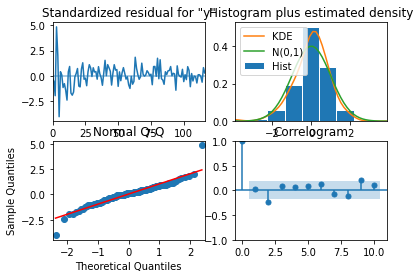

In [247]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [248]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [249]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,53.820031,25.160939,4.505497,103.134564
1,65.533187,25.760693,15.043156,116.023218
2,74.100528,25.843102,23.448979,124.752077
3,77.920761,25.883803,27.189440,128.652082
4,71.659471,25.918627,20.859895,122.459047


In [250]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

20.96395337000567


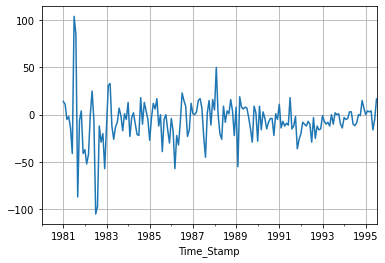

In [251]:
(df_2['Rose'].diff(12)).plot()
plt.grid();

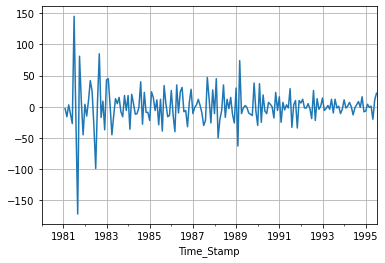

In [252]:
(df_2['Rose'].diff(12)).diff().plot()
plt.grid();

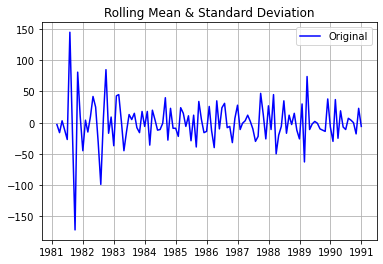

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [253]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

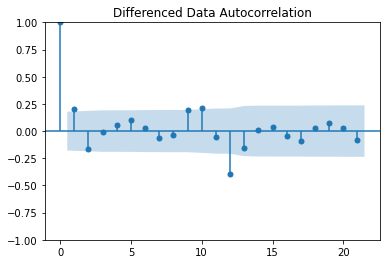

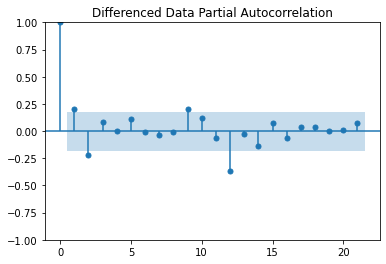

In [254]:
plot_acf(train['Rose'].diff(12).dropna(),title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff(12).dropna(),title='Differenced Data Partial Autocorrelation')
plt.show()

In [261]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61557D+00    |proj g|=  6.72325D-02

At iterate    5    f=  3.60489D+00    |proj g|=  1.58529D-02

At iterate   10    f=  3.48294D+00    |proj g|=  7.71313D-02

At iterate   15    f=  3.47459D+00    |proj g|=  3.80578D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   1.513D-05   3.475D+00
  F =   3.4745911508335059     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -458.646
Date:                            Wed, 30 Nov 2022   AIC                            927.292
Time:                                    21:04:41   BIC                            940.562
Sample:                                         0   HQIC                           932.669
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2139      0.117      1.829      0.067      -0.015       0.443
ma.L1         -0.9289      0.055   

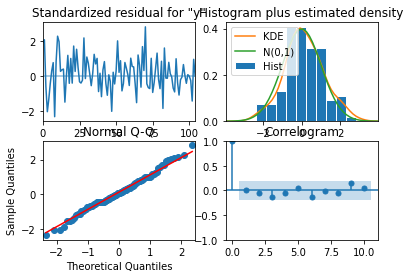

In [262]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [263]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [264]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,48.573382,19.009673,11.315107,85.831657
1,59.070598,19.766653,20.328669,97.812527
2,73.308522,19.925432,34.255393,112.361652
3,69.566998,20.014728,30.338852,108.795144
4,64.394885,20.091566,25.016139,103.773632


In [265]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

17.192729320317074


# Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [183]:
itertools.product(p, d, q)

In [184]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [185]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [186]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00750D+00    |proj g|=  3.85985D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.652D-07   5.007D+00
  F =   5.0074461648784689     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79818D+00    |proj g|=  1.13032D-01

At iterate    5    f=  4.68867D+00    |proj g|=  1.19806D-01

At iterate   10    f=  4.68397D+00    |proj g|=  2.53219D-03

At iterate   15    f=  4.68347D+00    |proj g|=  8.27106D-02

At iterate   20    f=  4.68104D+00    |proj g|=  2.15607D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     40      1     0     0   8.232D-07   4.681D+00
  F =   4.6810117216473932     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.27925D+00    |proj g|=  2.72406D-03

At iterate   15    f=  4.27854D+00    |proj g|=  1.60011D-02

At iterate   20    f=  4.27823D+00    |proj g|=  8.36235D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   1.156D-06   4.278D+00
  F =   4.2782324354224350     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515229
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.24235D+00    |proj g|=  1.20261D-01

At iterate    5    f=  4.20292D+00    |proj g|=  1.67488D-02

At iterate   10    f=  4.18200D+00    |proj g|=  9.86351D-02

At iterate   15    f=  4.12575D+00    |proj g|=  5.49812D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     24      1     0     0   3.206D-06   4.126D+00
  F =   4.1257228097548451     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.18384D+00    |proj g|=  1.40888D-01

At iterate   15    f=  4.14647D+00    |proj g|=  8.83227D-02

At iterate   20    f=  4.13333D+00    |proj g|=  1.75412D-01

At iterate   25    f=  4.07144D+00    |proj g|=  1.12432D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     42      1     0     0   2.011D-04   4.071D+00
  F =   4.0714258046814438     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.8564124359011
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.15331D+00    |proj g|=  9.43904D-02

At iterate   25    f=  4.12254D+00    |proj g|=  4.40521D-02

At iterate   30    f=  4.11994D+00    |proj g|=  1.99116D-02

At iterate   35    f=  4.11987D+00    |proj g|=  1.27890D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     70      2     0     0   3.846D-05   4.120D+00
  F =   4.1198693865563625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455180508797
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   10    f=  4.13408D+00    |proj g|=  2.79943D-02

At iterate   15    f=  4.06619D+00    |proj g|=  1.62272D-01

At iterate   20    f=  3.95378D+00    |proj g|=  1.53085D-01

At iterate   25    f=  3.94324D+00    |proj g|=  3.38019D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     39      1     0     0   6.366D-05   3.943D+00
  F =   3.9431985161469933     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082628062
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.05997D+00    |proj g|=  1.87169D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   8.066D-06   4.060D+00
  F =   4.0599712384699034     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1081.8324069560545
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61245D+00    |proj g|=  1.84364D-01

At iterate    5    f=  4.60190D+00    |proj g|=  1.69176D-02

At iterate   10

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f=  4.38901D+00    |proj g|=  1.11298D-02

At iterate   20    f=  4.38493D+00    |proj g|=  8.85981D-02

At iterate   25    f=  4.33347D+00    |proj g|=  6.18347D-02

At iterate   30    f=  4.33277D+00    |proj g|=  6.01633D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     46      1     0     0   2.689D-06   4.333D+00
  F =   4.3327724803814673     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1153.8519348207074
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0  

 This problem is unconstrained.


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1061.435984605108
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19830D+00    |proj g|=  8.72028D-02

At iterate    5    f=  4.19062D+00    |proj g|=  2.01872D-02

At iterate   10    f=  4.10632D+00    |proj g|=  1.87396D-01

At iterate   15    f=  4.08723D+00    |proj g|=  6.72449D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   3.250D-05   4.087D+00
  F =   4.0872140071239746     

CONVERGENCE: REL

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.17993D+00    |proj g|=  6.00484D-02

At iterate   15    f=  4.08830D+00    |proj g|=  1.16123D-01

At iterate   20    f=  4.08419D+00    |proj g|=  8.30956D-04

At iterate   25    f=  4.08419D+00    |proj g|=  1.49183D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   1.492D-05   4.084D+00
  F =   4.0841913151173754     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1090.2265071909871
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  4.06496D+00    |proj g|=  3.19556D-02

At iterate   15    f=  4.01005D+00    |proj g|=  2.37352D-01

At iterate   20    f=  3.90971D+00    |proj g|=  2.07479D-01

At iterate   25    f=  3.90087D+00    |proj g|=  3.16476D-02

At iterate   30    f=  3.90000D+00    |proj g|=  4.77358D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     42      1     0     0   2.119D-06   3.900D+00
  F =   3.9000009892072778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1043.6002611507213
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.71717D+00    |proj g|=  8.24256D-02

At iterate    5    f=  4.64746D+00    |proj g|=  2.78803D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.64538D+00    |proj g|=  9.39787D-02

At iterate   15    f=  4.63135D+00    |proj g|=  6.48885D-02

At iterate   20    f=  4.63106D+00    |proj g|=  3.29714D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     38      1     0     0   5.448D-06   4.631D+00
  F =   4.6310642408780254     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:1230.6009595917988
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1120.9425392418038
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.27681D+00    |proj g|=  8.01400D-02

At iterate    5    f=  4.26170D+00    |proj g|=  2.64319D-02

At iterate   10    f=  4.25579D+00    |proj g|=  3.60051D-02

At iterate   15    f=  4.18977D+00    |proj g|=  1.07412D-01

At iterate   20    f=  4.14513D+00    |proj g|=  4.54890D-02

At iterate   25    f=  4.14360D+00    |proj g|=  2.11152D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Pr

 This problem is unconstrained.


SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1105.9092655261704
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79601D+00    |proj g|=  2.46551D-01

At iterate    5    f=  4.76606D+00    |proj g|=  8.28630D-03

At iterate   10    f=  4.76563D+00    |proj g|=  5.22838D-02

At iterate   15    f=  4.75911D+00    |proj g|=  1.03025D-01

At iterate   20    f=  4.75827D+00    |proj g|=  7.19780D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   7.198D-0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.17636D+00    |proj g|=  1.00598D-01

At iterate   15    f=  4.10458D+00    |proj g|=  2.71828D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   5.258D-05   4.105D+00
  F =   4.1045622415175700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1093.6044317606386
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60571D+00    |proj g|=  2.52214D-01

At iterate    5

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.43992D+00    |proj g|=  7.59879D-02

At iterate   20    f=  4.43807D+00    |proj g|=  7.58632D-02

At iterate   25    f=  4.38360D+00    |proj g|=  5.38852D-01

At iterate   30    f=  4.36533D+00    |proj g|=  2.33436D-02

At iterate   35    f=  4.36524D+00    |proj g|=  3.95100D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     53      1     0     0   3.951D-05   4.365D+00
  F =   4.3652424259010232     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:1162.42400043787
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1083.258583438373
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20020D+00    |proj g|=  1.15666D-01

At iterate    5    f=  4.18566D+00    |proj g|=  1.76832D-02

At iterate   10    f=  4.12808D+00    |proj g|=  1.60035D-01

At iterate   15    f=  4.06808D+00    |proj g|=  5.42665D-02

At iterate   20    f=  4.06781D+00    |proj g|=  4.24816D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   4.248D-06

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.18760D+00    |proj g|=  2.35125D-02

At iterate   10    f=  4.17246D+00    |proj g|=  7.99802D-02

At iterate   15    f=  4.14459D+00    |proj g|=  1.06475D-01

At iterate   20    f=  4.05777D+00    |proj g|=  1.25932D-02

At iterate   25    f=  4.05747D+00    |proj g|=  1.04625D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     36      1     0     0   1.129D-05   4.057D+00
  F =   4.0574663889208349     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1083.1711266751004
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   35    f=  3.93477D+00    |proj g|=  4.92358D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     44      1     0     0   4.924D-05   3.935D+00
  F =   3.9347669307943405     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1052.7784697297059
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74701D+00    |proj g|=  2.06448D-01

At iterate    5    f=  4.71664D+00    |proj g|=  3.67193D-02

At iterate   10

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:1193.2804057586568
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16395D+00    |proj g|=  1.66644D-01

At iterate    5    f=  4.13145D+00    |proj g|=  2.60952D-02

At iterate   10    f=  4.11400D+00    |proj g|=  1.80440D-02

At iterate   15    f=  4.10413D+00    |proj g|=  4.37784D-02

At iterate   20    f=  4.06083D+00    |proj g|=  1.17129D-02

At iterate   25    f=  4.05987D+00    |proj g|=  1.59693D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Pr

 This problem is unconstrained.


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1083.8066266630817
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59373D+00    |proj g|=  2.45383D-01

At iterate    5    f=  4.56329D+00    |proj g|=  2.10833D-02

At iterate   10    f=  4.55975D+00    |proj g|=  2.65764D-03

At iterate   15    f=  4.55859D+00    |proj g|=  2.05241D-02

At iterate   20    f=  4.55765D+00    |proj g|=  4.75201D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   3.566D-0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.36444D+00    |proj g|=  2.85234D-01

At iterate   30    f=  4.35106D+00    |proj g|=  2.95501D-02

At iterate   35    f=  4.34746D+00    |proj g|=  9.29493D-02

At iterate   40    f=  4.33248D+00    |proj g|=  8.74594D-02

At iterate   45    f=  4.33137D+00    |proj g|=  3.35676D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     71      1     0     0   2.253D-04   4.331D+00
  F =   4.3313746636964963     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1155.482911215875
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.



At iterate   25    f=  4.02558D+00    |proj g|=  1.21316D-01

At iterate   30    f=  3.96830D+00    |proj g|=  3.50822D-02

At iterate   35    f=  3.96721D+00    |proj g|=  1.04527D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     47      1     0     0   8.565D-06   3.967D+00
  F =   3.9672077416492479     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1061.3428437954014
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.15183D+00    |proj g|=  2.95106D-02

At iterate   10    f=  4.14200D+00    |proj g|=  1.82256D-02

At iterate   15    f=  4.12443D+00    |proj g|=  6.09070D-02

At iterate   20    f=  4.10961D+00    |proj g|=  8.16954D-02

At iterate   25    f=  4.10193D+00    |proj g|=  6.89193D-02

At iterate   30    f=  4.09415D+00    |proj g|=  2.19165D-01

At iterate   35    f=  4.09112D+00    |proj g|=  2.13399D-01

At iterate   40    f=  4.08886D+00    |proj g|=  6.63940D-01

At iterate   45    f=  4.08859D+00    |proj g|=  3.08394D-01

At iterate   50    f=  4.08767D+00    |proj g|=  1.14007D-01

At iterate   55    f=  4.08718D+00    |proj g|=  4.04545D-01

At iterate   60    f=  4.08234D+00    |proj g|=  2.53699D-01

At iterate   65    f=  4.08224D+00    |proj g|=  2.78465D-02

At iterate   70    f=  4.08223D+00    |proj g|=  1.98134D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     71    112      1     0     0   1.981D-04   4.082D+00
  F =   4.0822283357919806     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1091.7082806490828
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.07880D+00    |proj g|=  7.25706D-02

At iterate    5    f=  4.05675D+00    |proj g|=  2.70683D-02

At iterate   10    f=  4.04582D+00    |proj g|=  4.18819D-02
  ys=-2.392E-03 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1128.9876565220645
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59058D+00    |proj g|=  7.46750D-02

At iterate    5    f=  4.58760D+00    |proj g|=  8.59003D-04

At iterate   10    f=  4.58746D+00    |proj g|=  7.57675D-03

At iterate   15    f=  4.58737D+00    |proj g|=  7.74866D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     17      1     0     0   7.749D-05   4.587D+00
  F =   4.5873729499564631     

CONVERGENCE: RE

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1099.0398509026224
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.18859D+00    |proj g|=  8.58091D-02

At iterate    5    f=  4.17405D+00    |proj g|=  5.24143D-02

At iterate   10    f=  4.16620D+00    |proj g|=  3.82724D-02

At iterate   15    f=  4.09671D+00    |proj g|=  8.01279D-02

At iterate   20    f=  4.09490D+00    |proj g|=  1.02941D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     26      1     0     0   5.179D-0

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1093.0537127081238
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16172D+00    |proj g|=  5.47837D-02

At iterate    5    f=  4.15220D+00    |proj g|=  2.14452D-02

At iterate   10    f=  4.13348D+00    |proj g|=  7.92493D-02

At iterate   15    f=  4.09320D+00    |proj g|=  1.10603D-01

At iterate   20    f=  4.07192D+00    |proj g|=  5.44631D-02

At iterate   25    f=  4.03751D+00    |proj g|=  1.39233D-01

At iterate   30    f=  4.03263D+00    |proj g|=  2.48240D-03

At iterate   35    f=  4.03262D+00    |proj g|=  2.47384D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm o

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.52041D+00    |proj g|=  4.68562D-03

At iterate   15    f=  4.51559D+00    |proj g|=  4.33893D-02

At iterate   20    f=  4.51293D+00    |proj g|=  4.74440D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   6.653D-06   4.513D+00
  F =   4.5129268888135678     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:1201.412698646782
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.42136D+00    |proj g|=  3.91000D-02

At iterate   25    f=  4.36526D+00    |proj g|=  1.14397D-01

At iterate   30    f=  4.35443D+00    |proj g|=  1.73305D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     44      1     0     0   3.339D-05   4.354D+00
  F =   4.3544268633087260     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1161.5686919135037
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  4.17914D+00    |proj g|=  7.79576D-02

At iterate   10    f=  4.16360D+00    |proj g|=  2.91685D-02

At iterate   15    f=  4.12256D+00    |proj g|=  2.32793D-02

At iterate   20    f=  4.10054D+00    |proj g|=  1.41766D-01

At iterate   25    f=  4.03734D+00    |proj g|=  1.03739D-02

At iterate   30    f=  4.03719D+00    |proj g|=  2.69124D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     49      1     0     0   2.992D-05   4.037D+00
  F =   4.0371926906767763     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1079.81887033866

 This problem is unconstrained.


SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1071.6995915092205
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16038D+00    |proj g|=  7.56172D-02

At iterate    5    f=  4.12931D+00    |proj g|=  3.64519D-02

At iterate   10    f=  4.12039D+00    |proj g|=  6.76451D-02

At iterate   15    f=  4.00594D+00    |proj g|=  1.39791D-01

At iterate   20    f=  3.99474D+00    |proj g|=  1.07045D-02


 This problem is unconstrained.



At iterate   25    f=  3.99424D+00    |proj g|=  5.68787D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     39      1     0     0   1.287D-05   3.994D+00
  F =   3.9942354649197140     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1068.4781627388045
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14098D+00    |proj g|=  6.63115D-02

At iterate    5    f=  4.11744D+00    |proj g|=  8.25196D-02

At iterate   10

 This problem is unconstrained.



At iterate   15    f=  4.04354D+00    |proj g|=  7.71143D-01

At iterate   20    f=  3.92849D+00    |proj g|=  1.99343D-01

At iterate   25    f=  3.92320D+00    |proj g|=  1.02615D-02

At iterate   30    f=  3.92301D+00    |proj g|=  8.74947D-04

At iterate   35    f=  3.92301D+00    |proj g|=  9.53547D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     51      1     0     0   9.535D-05   3.923D+00
  F =   3.9230055331531197     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1051.6734607524236
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74576D+00    |proj g|=  1.53090D-01

At iterate    5    f=  4.71545D+00    |proj g|=  5.41981D-02

At iterate   10    f=  4.71353D+00    |proj g|=  1.07438D-02

At iterate   15    f=  4.71322D+00    |proj g|=  3.83088D-03

At iterate   20    f=  4.71197D+00    |proj g|=  1.46768D-02

At iterate   25    f=  4.71178D+00    |proj g|=  1.58877D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Pr

 This problem is unconstrained.



At iterate    5    f=  4.12907D+00    |proj g|=  2.55514D-02

At iterate   10    f=  4.10754D+00    |proj g|=  2.07408D-01

At iterate   15    f=  4.07942D+00    |proj g|=  4.95232D-02

At iterate   20    f=  4.07598D+00    |proj g|=  7.18506D-02

At iterate   25    f=  4.04815D+00    |proj g|=  5.96871D-02

At iterate   30    f=  4.04757D+00    |proj g|=  1.83154D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     43      1     0     0   5.729D-06   4.048D+00
  F =   4.0475685732356084     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1082.55810333420

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.39984D+00    |proj g|=  1.77806D-01

At iterate   15    f=  4.36803D+00    |proj g|=  1.16624D-02
  ys=-4.184E-03  -gs= 2.637E-02 BFGS update SKIPPED

At iterate   20    f=  4.35839D+00    |proj g|=  1.96688D-01

At iterate   25    f=  4.34607D+00    |proj g|=  7.74301D-02

At iterate   30    f=  4.34546D+00    |proj g|=  4.35035D-02

At iterate   35    f=  4.34539D+00    |proj g|=  6.79625D-02

At iterate   40    f=  4.34377D+00    |proj g|=  6.49733D-01

At iterate   45    f=  4.31782D+00    |proj g|=  4.93396D-01

At iterate   50    f=  4.30742D+00    |proj g|=  3.18056D-01

At iterate   55    f=  4.30551D+00    |proj g|=  1.06170D-01

At iterate   60    f=  4.29629D+00    |proj g|=  1.08126D-01

At iterate   65    f=  4.29556D+00    |proj g|=  4.33903D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
N

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16295D+00    |proj g|=  1.38361D-01

At iterate    5    f=  4.12843D+00    |proj g|=  2.10899D-02

At iterate   10    f=  4.08625D+00    |proj g|=  6.39921D-01

At iterate   15    f=  4.05577D+00    |proj g|=  7.39778D-02

At iterate   20    f=  4.04251D+00    |proj g|=  6.94912D-02

At iterate   25    f=  4.00178D+00    |proj g|=  6.77930D-02

At iterate   30    f=  3.99424D+00    |proj g|=  5.44751D-02

At iterate   35    f=  3.97322D+00    |proj g|=  1.53076D-01

At iterate   40    f=  3.96677D+00    |proj g|=  2.14659D-02

At iterate   45    f=  3.96633D+00    |proj g|=  1.03062D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


At iterate   25    f=  4.02269D+00    |proj g|=  6.05076D-02

At iterate   30    f=  4.01402D+00    |proj g|=  6.01510D-03

At iterate   35    f=  4.01400D+00    |proj g|=  5.74311D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     50      1     0     0   5.743D-05   4.014D+00
  F =   4.0140005522078885     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457828825
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.



At iterate   15    f=  4.08553D+00    |proj g|=  6.06662D-02

At iterate   20    f=  4.07435D+00    |proj g|=  7.35316D-02

At iterate   25    f=  4.04267D+00    |proj g|=  5.26906D-02

At iterate   30    f=  4.00617D+00    |proj g|=  1.22196D-01

At iterate   35    f=  3.99358D+00    |proj g|=  2.35247D-02

At iterate   40    f=  3.99272D+00    |proj g|=  2.48778D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     54      1     0     0   1.452D-06   3.993D+00
  F =   3.9927165904376531     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.07717987554

 This problem is unconstrained.


At iterate   20    f=  3.94296D+00    |proj g|=  6.46248D-02

At iterate   25    f=  3.92293D+00    |proj g|=  1.84574D-01

At iterate   30    f=  3.90401D+00    |proj g|=  7.14521D-01

At iterate   35    f=  3.89471D+00    |proj g|=  1.04642D+00

At iterate   40    f=  3.89280D+00    |proj g|=  4.37178D-02

At iterate   45    f=  3.89167D+00    |proj g|=  4.44454D-01

At iterate   50    f=  3.89126D+00    |proj g|=  3.74308D-02

At iterate   55    f=  3.89125D+00    |proj g|=  3.72492D-02

At iterate   60    f=  3.89112D+00    |proj g|=  1.44409D-01

At iterate   65    f=  3.89103D+00    |proj g|=  4.50093D-02

At iterate   70    f=  3.89102D+00    |proj g|=  6.26437D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F    

In [187]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655818
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.229978
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.673461
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.778470


In [188]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.07880D+00    |proj g|=  7.25706D-02

At iterate    5    f=  4.05675D+00    |proj g|=  2.70683D-02

At iterate   10    f=  4.04582D+00    |proj g|=  4.18819D-02
  ys=-2.392E-03  -gs= 4.458E-02 BFGS update SKIPPED

At iterate   15    f=  4.01725D+00    |proj g|=  5.85116D-02

At iterate   20    f=  3.98996D+00    |proj g|=  1.58977D-01


 This problem is unconstrained.



At iterate   25    f=  3.93347D+00    |proj g|=  1.00902D-01

At iterate   30    f=  3.91384D+00    |proj g|=  3.78853D-02

At iterate   35    f=  3.91222D+00    |proj g|=  6.41203D-03

At iterate   40    f=  3.91096D+00    |proj g|=  7.31448D-02

At iterate   45    f=  3.89535D+00    |proj g|=  2.32431D-01

At iterate   50    f=  3.88518D+00    |proj g|=  1.68854D-02

At iterate   55    f=  3.88506D+00    |proj g|=  3.29103D-04

At iterate   60    f=  3.88506D+00    |proj g|=  2.88304D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     61     87      1     1     0   3.567D-05   3.885D+00
  F =   3.88505991505

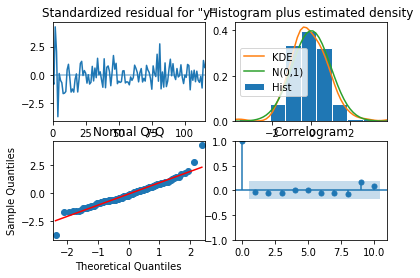

In [189]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()#Q–Q plot

## Predict on the Test Set using this model and evaluate the model.

In [190]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [191]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.842550,18.848391,25.900382,99.784718
1,67.631379,19.300252,29.803580,105.459178
2,74.747359,19.412816,36.698938,112.795779
3,71.326295,19.475764,33.154500,109.498090
4,76.018168,19.484043,37.830146,114.206189


In [192]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
mape_model21_test=MAPE(test['Rose'],predicted_auto_SARIMA_6.predicted_mean)

print(rmse)
print(mape_model21_test)

26.13567549329967
45.19


In [193]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape_model21_test]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf_11 = pd.concat([resultsDf_11,temp_resultsDf])

resultsDf_11

,Test RMSE,Test MAPE
"Auto ARIMA(0,1,2)",37.306480,64.81
"Manual ARIMA(1,1,1)",37.443197,65.08
"SARIMA(0,1,2)(2,0,2,6)",26.135675,45.19


### Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

In [194]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [195]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [196]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00750D+00    |proj g|=  3.85985D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.652D-07   5.007D+00
  F =   5.0074461648784689     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380891
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30273D+00    |proj g|=  8.59792D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   8.598D-06   4.303D+00
  F =   4.3027338598318261     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635751597
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61697D+00    |proj g|=  1.53844D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     14      1     0     0   1.538D-05   3.617D+00
  F =   3.6169743258913032     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.58185D+00    |proj g|=  3.88612D-03

At iterate   10    f=  3.58182D+00    |proj g|=  3.70026D-03

At iterate   15    f=  3.58172D+00    |proj g|=  4.53052D-03

At iterate   20    f=  3.58172D+00    |proj g|=  1.21842D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.218D-05   3.582D+00
  F =   3.5817179579339391     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945599
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.52809D+00    |proj g|=  8.13704D-01

At iterate   15    f=  3.46833D+00    |proj g|=  2.15994D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     28      1     0     0   1.160D-05   3.468D+00
  F =   3.4683007762817297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383767
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.26445D+00    |proj g|=  9.77384D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.23574D+00    |proj g|=  1.41313D-02

At iterate   10    f=  4.19459D+00    |proj g|=  3.51510D-01

At iterate   15    f=  4.12806D+00    |proj g|=  1.74537D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     27      1     0     0   1.226D-06   4.128D+00
  F =   4.1280061836811832     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918323
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947217
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70606D+00    |proj g|=  1.16728D-01

At iterate    5    f=  3.66794D+00    |proj g|=  1.64727D-02

At iterate   10    f=  3.64073D+00    |proj g|=  5.56530D-02

At iterate   15    f=  3.44794D+00    |proj g|=  8.75422D-02

At iterate   20    f=  3.44271D+00    |proj g|=  7.75865D-03

At iterate   25    f=  3.44264D+00    |proj g|=  2.93560D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     P

 This problem is unconstrained.



At iterate   15    f=  3.43448D+00    |proj g|=  5.05346D-02

At iterate   20    f=  3.43408D+00    |proj g|=  7.96052D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     33      1     0     0   7.961D-06   3.434D+00
  F =   3.4340844191423492     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535802
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73874D+00    |proj g|=  7.56750D-02

At iterate    5

 This problem is unconstrained.



At iterate   15    f=  3.43852D+00    |proj g|=  1.26595D-01

At iterate   20    f=  3.42934D+00    |proj g|=  1.91668D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     34      1     0     0   5.392D-06   3.429D+00
  F =   3.4292925872960835     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461661
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68289D+00    |proj g|=  9.85056D-02

At iterate    5

 This problem is unconstrained.



At iterate   10    f=  3.57795D+00    |proj g|=  1.71271D-01

At iterate   15    f=  3.52131D+00    |proj g|=  7.58245D-02

At iterate   20    f=  3.43576D+00    |proj g|=  4.94194D-01

At iterate   25    f=  3.37650D+00    |proj g|=  6.08544D-02

At iterate   30    f=  3.37301D+00    |proj g|=  9.06300D-03

At iterate   35    f=  3.36953D+00    |proj g|=  3.81101D-02

At iterate   40    f=  3.36865D+00    |proj g|=  1.16551D-02

At iterate   45    f=  3.36827D+00    |proj g|=  4.90675D-03

At iterate   50    f=  3.36819D+00    |proj g|=  3.99095D-03

At iterate   55    f=  3.36818D+00    |proj g|=  2.03410D-03

At iterate   60    f=  3.36818D+00    |proj g|=  6.26413D-04

At iterate   65    f=  3.36818D+00    |proj g|=  1.54317D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15320D+00    |proj g|=  1.06383D-01

At iterate    5    f=  4.13728D+00    |proj g|=  1.18512D-02

At iterate   10    f=  4.12216D+00    |proj g|=  1.42571D-01

At iterate   15    f=  4.07443D+00    |proj g|=  3.76206D-02

At iterate   20    f=  4.07381D+00    |proj g|=  6.22311D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     27      1     0     0   6.223D-06   4.074D+00
  F =   4.0738132482064140     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.17278D+00    |proj g|=  1.58683D-01

At iterate   15    f=  4.09623D+00    |proj g|=  1.00393D-01

At iterate   20    f=  4.09407D+00    |proj g|=  3.06993D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     28      1     0     0   1.363D-05   4.094D+00
  F =   4.0940654709900457     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341372
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   15    f=  3.50486D+00    |proj g|=  2.08492D-01

At iterate   20    f=  3.39380D+00    |proj g|=  1.08431D-01

At iterate   25    f=  3.38194D+00    |proj g|=  5.13770D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   8.074D-05   3.382D+00
  F =   3.3819359520992358     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913541983
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   20    f=  3.42049D+00    |proj g|=  1.56959D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     29      1     0     0   1.570D-06   3.420D+00
  F =   3.4204946637340838     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257982
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69475D+00    |proj g|=  6.55364D-02

At iterate    5    f=  3.67886D+00    |proj g|=  1.95074D-02

At iterate   10

 This problem is unconstrained.



At iterate   20    f=  3.42379D+00    |proj g|=  1.52609D-01

At iterate   25    f=  3.41731D+00    |proj g|=  1.36383D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   2.437D-05   3.417D+00
  F =   3.4173134640326879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545046296
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60284D+00    |proj g|=  1.03104D-01

At iterate    5

 This problem is unconstrained.



At iterate   15    f=  3.38906D+00    |proj g|=  2.56644D-01

At iterate   20    f=  3.31168D+00    |proj g|=  6.30424D-02

At iterate   25    f=  3.31037D+00    |proj g|=  5.69037D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     34      1     0     0   2.345D-05   3.310D+00
  F =   3.3103693506359240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085678839
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257691
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.29750D+00    |proj g|=  5.26649D-02

At iterate    5    f=  4.28582D+00    |proj g|=  8.83416D-02

At iterate   10    f=  4.23821D+00    |proj g|=  1.74289D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   2.464D-06   4.238D+00
  F =   4.2382048434865593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.68476D+00    |proj g|=  1.91002D-01

At iterate   15    f=  3.59281D+00    |proj g|=  4.46712D-03

At iterate   20    f=  3.59280D+00    |proj g|=  1.23919D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.239D-06   3.593D+00
  F =   3.5928037776320747     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948677
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778663867
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74998D+00    |proj g|=  7.71543D-02

At iterate    5    f=  3.73507D+00    |proj g|=  2.17917D-02

At iterate   10    f=  3.55629D+00    |proj g|=  2.18635D-01

At iterate   15    f=  3.52621D+00    |proj g|=  6.80085D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   9.273D-06   3.526D+00
  F =   3.5261693688110092     

CONVERGENCE: NO

 This problem is unconstrained.


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071267
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79601D+00    |proj g|=  2.46551D-01

At iterate    5    f=  4.76606D+00    |proj g|=  8.28630D-03

At iterate   10    f=  4.76563D+00    |proj g|=  5.22838D-02

At iterate   15    f=  4.75911D+00    |proj g|=  1.03025D-01

At iterate   20    f=  4.75827D+00    |proj g|=  7.19780D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   7.198D-0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.67921D+00    |proj g|=  1.63520D-02

At iterate   10    f=  3.64967D+00    |proj g|=  8.48309D-02

At iterate   15    f=  3.46782D+00    |proj g|=  7.54153D-02

At iterate   20    f=  3.45866D+00    |proj g|=  1.20864D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   9.465D-06   3.459D+00
  F =   3.4586599333575307     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063881
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.18948D+00    |proj g|=  2.64416D-02

At iterate   10    f=  4.18448D+00    |proj g|=  9.13561D-02

At iterate   15    f=  4.08297D+00    |proj g|=  1.54257D-01

At iterate   20    f=  4.07346D+00    |proj g|=  9.53481D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     28      1     0     0   1.404D-05   4.073D+00
  F =   4.0734613503902866     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965030357
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate   15    f=  3.42854D+00    |proj g|=  5.35346D-02

At iterate   20    f=  3.42564D+00    |proj g|=  1.30576D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   5.104D-05   3.426D+00
  F =   3.4255869047360967     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428503295
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68536D+00    |proj g|=  5.43768D-02

At iterate    5

 This problem is unconstrained.



At iterate   10    f=  3.43777D+00    |proj g|=  1.88372D-01

At iterate   15    f=  3.39429D+00    |proj g|=  6.99229D-02

At iterate   20    f=  3.39365D+00    |proj g|=  1.91701D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     35      1     0     0   6.199D-06   3.394D+00
  F =   3.3936549472893880     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060843985
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.67133D+00    |proj g|=  1.79669D-02

At iterate   10    f=  3.51896D+00    |proj g|=  4.77567D-01

At iterate   15    f=  3.39174D+00    |proj g|=  3.66169D-02

At iterate   20    f=  3.39128D+00    |proj g|=  3.00155D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     27      1     0     0   2.104D-05   3.391D+00
  F =   3.3912776013146329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.297286747063
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0  

 This problem is unconstrained.



At iterate   15    f=  3.42463D+00    |proj g|=  8.02003D-02

At iterate   20    f=  3.35867D+00    |proj g|=  7.79011D-03

At iterate   25    f=  3.35861D+00    |proj g|=  7.83344D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     35      1     0     0   1.355D-06   3.359D+00
  F =   3.3586082560366792     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936833
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928101031
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64290D+00    |proj g|=  1.06441D-01

At iterate    5    f=  3.61078D+00    |proj g|=  1.61557D-02

At iterate   10    f=  3.52058D+00    |proj g|=  2.77620D-01


 This problem is unconstrained.



At iterate   15    f=  3.49551D+00    |proj g|=  1.12945D-01

At iterate   20    f=  3.46735D+00    |proj g|=  2.48112D+00

At iterate   25    f=  3.43001D+00    |proj g|=  8.65654D-02

At iterate   30    f=  3.42235D+00    |proj g|=  1.82249D-02

At iterate   35    f=  3.42233D+00    |proj g|=  9.53992D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     48      1     0     0   9.540D-06   3.422D+00
  F =   3.4223251525959859     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938402853403
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17302D+00    |proj g|=  7.75713D-02

At iterate    5    f=  4.15474D+00    |proj g|=  1.42295D-02

At iterate   10    f=  4.13872D+00    |proj g|=  6.69343D-02

At iterate   15    f=  4.12693D+00    |proj g|=  4.00738D-02

At iterate   20    f=  4.10885D+00    |proj g|=  1.45805D+00

At iterate   25    f=  4.10048D+00    |proj g|=  1.40634D-01

At iterate   30    f=  4.09901D+00    |proj g|=  3.13639D-01

At iterate   35    f=  4.09406D+00    |proj g|=  5.41268D-02

At iterate   40    f=  4.09385D+00    |proj g|=  5.71508D-03

At iterate   45    f=  4.09385D+00    |proj g|=  1.99930D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Ca

 This problem is unconstrained.



At iterate   15    f=  4.00754D+00    |proj g|=  1.18369D-01

At iterate   20    f=  3.99821D+00    |proj g|=  1.49925D-01

At iterate   25    f=  3.95441D+00    |proj g|=  3.95307D-01

At iterate   30    f=  3.93965D+00    |proj g|=  3.53039D-02

At iterate   35    f=  3.90901D+00    |proj g|=  9.12913D-02

At iterate   40    f=  3.90445D+00    |proj g|=  1.89284D-02

At iterate   45    f=  3.90386D+00    |proj g|=  1.60745D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     79      1     0     0   2.273D-05   3.904D+00
  F =   3.9038572772617721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  3.52802D+00    |proj g|=  1.87541D-01

At iterate   15    f=  3.44358D+00    |proj g|=  6.58122D-02

At iterate   20    f=  3.43206D+00    |proj g|=  1.79589D-01

At iterate   25    f=  3.42435D+00    |proj g|=  2.43196D-01

At iterate   30    f=  3.42148D+00    |proj g|=  1.21569D-01

At iterate   35    f=  3.41939D+00    |proj g|=  4.42769D-02

At iterate   40    f=  3.39265D+00    |proj g|=  1.12510D-01

At iterate   45    f=  3.38473D+00    |proj g|=  1.20447D-01

At iterate   50    f=  3.38156D+00    |proj g|=  3.02656D-03

At iterate   55    f=  3.38156D+00    |proj g|=  3.32658D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  3.48275D+00    |proj g|=  1.56161D-01

At iterate   20    f=  3.48131D+00    |proj g|=  3.19460D-01

At iterate   25    f=  3.44409D+00    |proj g|=  2.48544D-01

At iterate   30    f=  3.40095D+00    |proj g|=  7.98698D-02

At iterate   35    f=  3.38815D+00    |proj g|=  5.46343D-02

At iterate   40    f=  3.38703D+00    |proj g|=  1.32184D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     72      1     0     0   9.529D-06   3.387D+00
  F =   3.3870038623388834     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.16901965746

 This problem is unconstrained.



At iterate   15    f=  3.45331D+00    |proj g|=  1.55273D-01

At iterate   20    f=  3.42940D+00    |proj g|=  7.49709D-01

At iterate   25    f=  3.42855D+00    |proj g|=  7.35403D-02

At iterate   30    f=  3.42362D+00    |proj g|=  6.21033D-01

At iterate   35    f=  3.39680D+00    |proj g|=  5.22692D-02

At iterate   40    f=  3.38609D+00    |proj g|=  5.24687D-02

At iterate   45    f=  3.38442D+00    |proj g|=  1.17203D-02

At iterate   50    f=  3.38432D+00    |proj g|=  1.04254D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     76      1     0     0   1.043D-06   3.384D+00
  F =   3.38431735905

 This problem is unconstrained.



At iterate   15    f=  3.41630D+00    |proj g|=  1.16814D-01

At iterate   20    f=  3.36881D+00    |proj g|=  2.63567D+00

At iterate   25    f=  3.36597D+00    |proj g|=  7.09138D-02

At iterate   30    f=  3.36283D+00    |proj g|=  9.60516D-01

At iterate   35    f=  3.36057D+00    |proj g|=  3.44332D-01

At iterate   40    f=  3.34978D+00    |proj g|=  9.08419D-01

At iterate   45    f=  3.34696D+00    |proj g|=  2.68353D-01

At iterate   50    f=  3.33990D+00    |proj g|=  1.69077D+00

At iterate   55    f=  3.33609D+00    |proj g|=  1.47584D-01

At iterate   60    f=  3.33597D+00    |proj g|=  1.22472D-01

At iterate   65    f=  3.33595D+00    |proj g|=  4.26629D-02

At iterate   70    f=  3.33594D+00    |proj g|=  2.48262D-02

At iterate   75    f=  3.33594D+00    |proj g|=  5.26276D-03

At iterate   80    f=  3.33594D+00    |proj g|=  1.68735D-02

At iterate   85    f=  3.33594D+00    |proj g|=  1.75891D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:896.6869385508987
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82672D+00    |proj g|=  6.57163D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   6.572D-06   4.827D+00
  F =   4.8267187733090031     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.253756153577
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.59598D+00    |proj g|=  2.20123D-02

At iterate   15    f=  3.59121D+00    |proj g|=  1.80633D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   4.213D-06   3.591D+00
  F =   3.5912095487992217     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829946
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19667D+00    |proj g|=  8.62226D-02

At iterate    5

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863198641076
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73982D+00    |proj g|=  1.28107D-01

At iterate    5    f=  3.70863D+00    |proj g|=  1.52043D-02

At iterate   10    f=  3.61511D+00    |proj g|=  2.30314D-01

At iterate   15    f=  3.55760D+00    |proj g|=  6.38276D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   1.254D-05   3.558D+00
  F =   3.5575712748331032     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165559393
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65756D+00    |proj g|=  4.24824D-02

At iterate    5    f=  3.64811D+00    |proj g|=  4.99136D-02

At iterate   10    f=  3.48951D+00    |proj g|=  1.79700D-01

At iterate   15

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.64876D+00    |proj g|=  1.85650D-02

At iterate   10    f=  3.50157D+00    |proj g|=  2.23491D-01

At iterate   15    f=  3.46205D+00    |proj g|=  5.73071D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     22      1     0     0   4.178D-05   3.462D+00
  F =   3.4620294702213430     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384345
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   15    f=  3.46303D+00    |proj g|=  5.26298D-02

At iterate   20    f=  3.46151D+00    |proj g|=  1.57554D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     28      1     0     0   1.318D-06   3.462D+00
  F =   3.4615078383639362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280792
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80594D+00    |proj g|=  7.54047D-02

At iterate    5

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949406
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69900D+00    |proj g|=  1.03373D-01

At iterate    5    f=  3.66388D+00    |proj g|=  5.51283D-02


 This problem is unconstrained.



At iterate   10    f=  3.65229D+00    |proj g|=  3.38120D-02

At iterate   15    f=  3.51641D+00    |proj g|=  2.23311D-01

At iterate   20    f=  3.45078D+00    |proj g|=  4.93311D-02

At iterate   25    f=  3.45053D+00    |proj g|=  3.66656D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     45      1     0     0   7.770D-06   3.451D+00
  F =   3.4505335121625129     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472109034
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14255D+00    |proj g|=  6.82047D-02

At iterate    5    f=  4.11396D+00    |proj g|=  3.19746D-02

At iterate   10    f=  4.10356D+00    |proj g|=  3.49142D-02

At iterate   15    f=  3.98082D+00    |proj g|=  1.59982D-01

At iterate   20    f=  3.94971D+00    |proj g|=  5.46535D-02

At iterate   25    f=  3.94292D+00    |proj g|=  8.28458D-03

At iterate   30    f=  3.94290D+00    |proj g|=  2.17815D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.924447120571
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68932D+00    |proj g|=  1.21749D-01

At iterate    5    f=  3.64556D+00    |proj g|=  2.69003D-02

At iterate   10    f=  3.63460D+00    |proj g|=  4.54312D-02


 This problem is unconstrained.



At iterate   15    f=  3.50458D+00    |proj g|=  2.79887D-01

At iterate   20    f=  3.42757D+00    |proj g|=  5.49497D-02

At iterate   25    f=  3.41759D+00    |proj g|=  1.81917D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     38      1     0     0   2.428D-05   3.418D+00
  F =   3.4175851942509459     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822497
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   20    f=  3.35057D+00    |proj g|=  3.01919D-02

At iterate   25    f=  3.35045D+00    |proj g|=  9.70629D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   2.466D-05   3.350D+00
  F =   3.3504475788637760     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608200369
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65213D+00    |proj g|=  8.48721D-02

At iterate    5

 This problem is unconstrained.



At iterate   15    f=  3.35944D+00    |proj g|=  1.42107D-01

At iterate   20    f=  3.34717D+00    |proj g|=  8.21893D-03

At iterate   25    f=  3.34712D+00    |proj g|=  7.69141D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     35      1     0     0   3.340D-05   3.347D+00
  F =   3.3471210474885313     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369722
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   15    f=  3.47752D+00    |proj g|=  2.26179D-01

At iterate   20    f=  3.37267D+00    |proj g|=  1.35751D-01

At iterate   25    f=  3.34687D+00    |proj g|=  2.40003D-02

At iterate   30    f=  3.34653D+00    |proj g|=  3.49996D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     44      1     0     0   1.182D-05   3.347D+00
  F =   3.3465287372297174     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866286454
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.07524D+00    |proj g|=  2.02378D-02

At iterate   25    f=  4.06827D+00    |proj g|=  3.68418D-02

At iterate   30    f=  4.06805D+00    |proj g|=  5.17068D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     40      1     0     0   7.560D-07   4.068D+00
  F =   4.0680468002265942     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598209
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  3.61107D+00    |proj g|=  1.63276D-02

At iterate   10    f=  3.57148D+00    |proj g|=  1.14082D-01

At iterate   15    f=  3.42498D+00    |proj g|=  2.62873D-01

At iterate   20    f=  3.41924D+00    |proj g|=  5.25135D-03

At iterate   25    f=  3.41807D+00    |proj g|=  1.14834D-02

At iterate   30    f=  3.41790D+00    |proj g|=  1.28621D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     44      1     0     0   4.542D-06   3.418D+00
  F =   3.4179008754231899     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.32583111172

 This problem is unconstrained.


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713703402
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.07939D+00    |proj g|=  8.77080D-02

At iterate    5    f=  4.05830D+00    |proj g|=  1.64961D-02

At iterate   10    f=  4.03049D+00    |proj g|=  1.19434D-01

At iterate   15    f=  3.95729D+00    |proj g|=  6.35131D-02

At iterate   20    f=  3.95149D+00    |proj g|=  5.08888D-02


 This problem is unconstrained.



At iterate   25    f=  3.94008D+00    |proj g|=  1.28305D-01

At iterate   30    f=  3.91157D+00    |proj g|=  6.91832D-02

At iterate   35    f=  3.90601D+00    |proj g|=  1.08889D-01

At iterate   40    f=  3.90247D+00    |proj g|=  1.17697D-02

At iterate   45    f=  3.90224D+00    |proj g|=  2.83016D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     65      1     0     0   8.949D-06   3.902D+00
  F =   3.9022383916849681     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354048316
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   15    f=  3.46159D+00    |proj g|=  1.34043D-01

At iterate   20    f=  3.38477D+00    |proj g|=  1.50388D-01

At iterate   25    f=  3.37763D+00    |proj g|=  8.22103D-03

At iterate   30    f=  3.37758D+00    |proj g|=  7.55559D-03

At iterate   35    f=  3.37752D+00    |proj g|=  1.91642D-03

At iterate   40    f=  3.37752D+00    |proj g|=  2.83293D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     50      1     0     0   2.833D-05   3.378D+00
  F =   3.3775232912174107     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.66614888139

 This problem is unconstrained.



At iterate   15    f=  3.35147D+00    |proj g|=  2.30323D-01

At iterate   20    f=  3.34778D+00    |proj g|=  3.23778D-02

At iterate   25    f=  3.34653D+00    |proj g|=  1.01413D-01

At iterate   30    f=  3.34601D+00    |proj g|=  1.70029D-03

At iterate   35    f=  3.34601D+00    |proj g|=  3.34809D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     46      1     0     0   3.348D-05   3.346D+00
  F =   3.3460092577913403     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464440569138
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   15    f=  3.35524D+00    |proj g|=  1.00873D-01

At iterate   20    f=  3.34413D+00    |proj g|=  1.37024D-02

At iterate   25    f=  3.34344D+00    |proj g|=  5.91911D-02

At iterate   30    f=  3.34235D+00    |proj g|=  1.79642D-03

At iterate   35    f=  3.34234D+00    |proj g|=  8.26844D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     53      1     0     0   7.276D-05   3.342D+00
  F =   3.3423416246370850     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889041904
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   15    f=  3.34229D+00    |proj g|=  2.90231D-01

At iterate   20    f=  3.31048D+00    |proj g|=  3.53299D-02

At iterate   25    f=  3.30760D+00    |proj g|=  1.33072D-02

At iterate   30    f=  3.30669D+00    |proj g|=  2.49392D-02

At iterate   35    f=  3.30558D+00    |proj g|=  4.40698D-03

At iterate   40    f=  3.30556D+00    |proj g|=  8.09807D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41     48      1     0     0   2.556D-05   3.306D+00
  F =   3.3055636291169090     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.66879808686

In [197]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
53,"(1, 1, 2)","(2, 0, 2, 12)",896.686939
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [198]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60284D+00    |proj g|=  1.03104D-01

At iterate    5    f=  3.57509D+00    |proj g|=  1.81151D-02

At iterate   10    f=  3.55771D+00    |proj g|=  4.60310D-02


 This problem is unconstrained.



At iterate   15    f=  3.38906D+00    |proj g|=  2.56644D-01

At iterate   20    f=  3.31168D+00    |proj g|=  6.30424D-02

At iterate   25    f=  3.31037D+00    |proj g|=  5.69037D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     34      1     0     0   2.345D-05   3.310D+00
  F =   3.3103693506359240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log

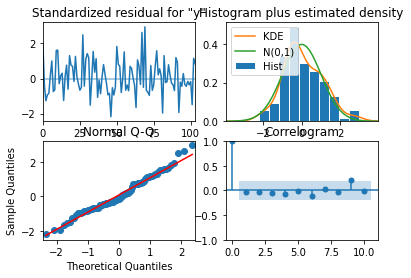

In [199]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [200]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [201]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867262,15.928500,31.647975,94.086549
1,70.541189,16.147658,38.892361,102.190018
2,77.356410,16.147656,45.707586,109.005234
3,76.208814,16.147656,44.559990,107.857637
4,72.747397,16.147656,41.098573,104.396221


In [202]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
mape_model22_test=MAPE(test['Rose'],predicted_auto_SARIMA_12.predicted_mean)

print(rmse)
print(mape_model22_test)

26.92836118822883
46.6


In [203]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape_model22_test]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf_11 = pd.concat([resultsDf_11,temp_resultsDf])

resultsDf_11

,Test RMSE,Test MAPE
"Auto ARIMA(0,1,2)",37.306480,64.81
"Manual ARIMA(1,1,1)",37.443197,65.08
"SARIMA(0,1,2)(2,0,2,6)",26.135675,45.19
"SARIMA(0,1,2)(2,0,2,12)",26.928361,46.60


## Evaluate the model on the whole and predict 12 months into the future .

In [266]:
fullmodel2 = ExponentialSmoothing(df_2['Rose'],
                                  trend='additive',
                                  seasonal='multiplicative',seasonal_periods=12).fit(smoothing_level=0.3,
                                                                 smoothing_slope=0.3,
                                                                 smoothing_seasonal=0.3)

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4838/284771042.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fullmodel2 = ExponentialSmoothing(df_2['Rose'],


In [267]:
RMSE_fullmodel2 = metrics.mean_squared_error(df_2['Rose'],fullmodel2.fittedvalues,squared=False)
MAPE_fullmodel2 = MAPE(df_2['Rose'],fullmodel2.fittedvalues)

print('RMSE:',RMSE_fullmodel2,'\nMAPE:',MAPE_fullmodel2)

RMSE: 19.958934298081722 
MAPE: 15.61


In [268]:
prediction_1 = fullmodel2.forecast(steps=12)

In [269]:
df_2.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


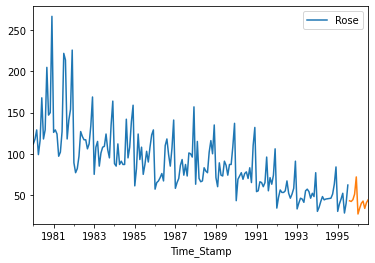

In [270]:
df_2.plot()
prediction_1.plot();

In [271]:
np.percentile(prediction_1,[2.5,97.5])

array([28.67199372, 66.10737925])

In [272]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,14.181351,42.853345,108.960724
1995-09-30,13.379478,42.051471,108.158851
1995-10-31,15.578047,44.250041,110.357420
1995-11-30,22.254341,50.926335,117.033714
1995-12-31,43.193713,71.865706,137.973086


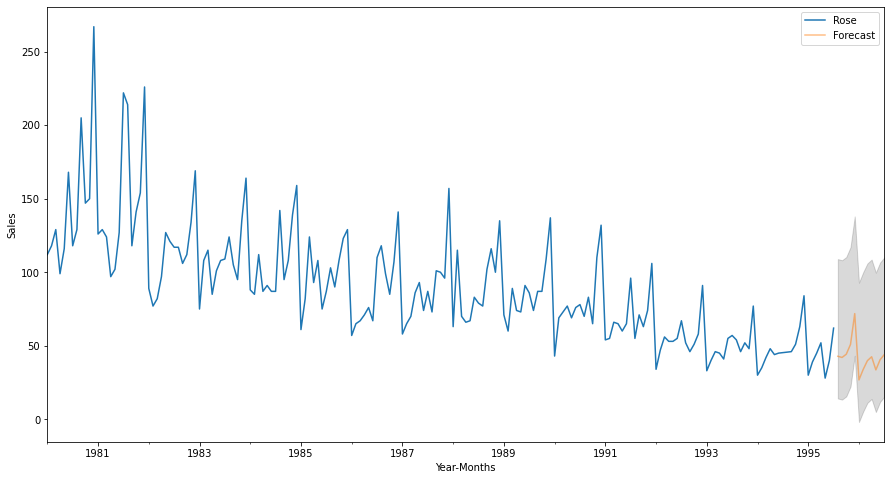

In [273]:
axis = df_2.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [277]:
prediction_1.head(14)

1995-08-31    42.853345
1995-09-30    42.051471
1995-10-31    44.250041
1995-11-30    50.926335
1995-12-31    71.865706
1996-01-31    26.802084
1996-02-29    33.894095
1996-03-31    39.871616
1996-04-30    42.505844
1996-05-31    33.601754
1996-06-30    40.500190
1996-07-31    44.012497
Freq: M, dtype: float64

In [279]:
df_2.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0
